In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Univariate EDA

In [7]:
df = pd.read_csv('data_after_feature_engg.csv')

In [8]:
pd.set_option('display.max_colwidth',None)
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns', None)

In [9]:
df.sample(5)

society property_type      sector  price  \
3699  signature global orchard avenue          flat   sector 93   0.36   
1527      bestech park view sanskruti          flat   sector 92   1.55   
2186                      independent         house  sector 110   0.34   
3464                       bptp terra          flat  sector 37d   1.80   
1966                      independent         house  sector 105   0.37   

      price_per_sqft    area  \
3699          6715.0   536.0   
1527          9687.0  1600.0   
2186          6800.0   500.0   
3464          8215.0  2191.0   
1966          8222.0   450.0   

                                                                       areaWithType  \
3699                                               Carpet area: 543.53 (50.5 sq.m.)   
1527  Super Built up area 1995(185.34 sq.m.)Carpet area: 1600 sq.ft. (148.64 sq.m.)   
2186                                               Built Up area: 500 (46.45 sq.m.)   
3464                                         Super Built up area 2191(203.55 sq.m.)   
1966                                                     Plot area 450(41.81 sq.m.)   

      bedRoom  bathroom balcony  floorNum facing   agePossession  \
3699        2         2       2       6.0  North  Relatively New   
1527        3         3       3      17.0    NaN  Relatively New   
2186        1         1       0       1.0    NaN       Undefined   
3464        4         3       3      12.0  North  Relatively New   
1966        2         2       1       1.0    NaN  Moderately Old   

      super_built_up_area  built_up_area  carpet_area  study room  \
3699                  NaN            NaN    543.57695           0   
1527               1995.0            NaN   1600.00000           0   
2186                  NaN          500.0          NaN           0   
3464               2191.0            NaN          NaN           1   
1966                  NaN          450.0          NaN           0   

      servant room  store room  puja room  others  Chimney  Microwave  Light  \
3699             0           0          0       0        0          0      0   
1527             1           0          0       0        1          0     10   
2186             0           0          0       0        0          0      1   
3464             0           0          0       0        1          0      6   
1966             0           0          0       1        0          0      0   

      Washing Machine  AC  Dining Table  Fridge  Modular Kitchen  Curtains  \
3699                0   0             0       0                0         0   
1527                0   5             0       0                1         0   
2186                0   0             0       0                0         0   
3464                0   6             0       0                1         0   
1966                0   0             0       0                0         0   

      Wardrobe  Fan  Bed  Exhaust Fan  Sofa  Geyser  Stove  Water Purifier  \
3699         0    0    0            0     0       0      0               0   
1527         3    6    0            1     0       3      0               0   
2186         1    1    0            0     0       0      0               0   
3464         0    5    0            0     0       0      1               0   
1966         0    0    0            0     0       0      0               0   

      TV  furnishing_type  luxury_score  
3699   0                0            16  
1527   0                1            60  
2186   0                0             0  
3464   0                1           144  
1966   0                0             0

In [10]:
df.shape

(3803, 41)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3803 entries, 0 to 3802
Data columns (total 41 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   society              3802 non-null   object 
 1   property_type        3803 non-null   object 
 2   sector               3803 non-null   object 
 3   price                3785 non-null   float64
 4   price_per_sqft       3785 non-null   float64
 5   area                 3785 non-null   float64
 6   areaWithType         3803 non-null   object 
 7   bedRoom              3803 non-null   int64  
 8   bathroom             3803 non-null   int64  
 9   balcony              3803 non-null   object 
 10  floorNum             3784 non-null   float64
 11  facing               2698 non-null   object 
 12  agePossession        3803 non-null   object 
 13  super_built_up_area  1915 non-null   float64
 14  built_up_area        1733 non-null   float64
 15  carpet_area          1944 non-null   f

In [12]:
df.drop(columns = ['Chimney','Microwave','Light','Washing Machine','AC','Dining Table','Fridge','Modular Kitchen','Curtains','Wardrobe','Fan','Bed','Exhaust Fan','Sofa','Geyser','Stove','Water Purifier','TV'], inplace = True)

In [13]:
df.shape

(3803, 23)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3803 entries, 0 to 3802
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   society              3802 non-null   object 
 1   property_type        3803 non-null   object 
 2   sector               3803 non-null   object 
 3   price                3785 non-null   float64
 4   price_per_sqft       3785 non-null   float64
 5   area                 3785 non-null   float64
 6   areaWithType         3803 non-null   object 
 7   bedRoom              3803 non-null   int64  
 8   bathroom             3803 non-null   int64  
 9   balcony              3803 non-null   object 
 10  floorNum             3784 non-null   float64
 11  facing               2698 non-null   object 
 12  agePossession        3803 non-null   object 
 13  super_built_up_area  1915 non-null   float64
 14  built_up_area        1733 non-null   float64
 15  carpet_area          1944 non-null   f

In [15]:
df.duplicated().sum()

125

In [16]:
df.drop_duplicates(inplace = True)

In [17]:
df.shape

(3678, 23)

In [18]:
df.sample(5)

society property_type      sector  price  price_per_sqft  \
2245     not applicable          flat    sector 4   0.42          5600.0   
500                  ss          flat   sector 85   1.18          7170.0   
1826    raheja navodaya          flat   sector 92   0.62          4807.0   
3202  indiabulls enigma          flat  sector 110   3.45         10147.0   
347                 nul         house   sector 25   6.25         34722.0   

        area  \
2245   750.0   
500   1646.0   
1826  1290.0   
3202  3400.0   
347   1800.0   

                                                                                                               areaWithType  \
2245                                                                                         Carpet area: 750 (69.68 sq.m.)   
500   Super Built up area 1640(152.36 sq.m.)Built Up area: 1630 sq.ft. (151.43 sq.m.)Carpet area: 1620 sq.ft. (150.5 sq.m.)   
1826                                               Built Up area: 1498 (139.17 sq.m.)Carpet area: 1064 sq.ft. (98.85 sq.m.)   
3202                                                                                 Super Built up area 3400(315.87 sq.m.)   
347                                                                                             Plot area 200(167.23 sq.m.)   

      bedRoom  bathroom balcony  floorNum facing   agePossession  \
2245        2         2       1       3.0    NaN  Relatively New   
500         2         2       3       4.0   West  Relatively New   
1826        2         2       2       5.0    NaN    New Property   
3202        4         4       3       9.0  North  Moderately Old   
347         5         5       3       2.0   East  Moderately Old   

      super_built_up_area  built_up_area  carpet_area  study room  \
2245                  NaN            NaN        750.0           0   
500                1640.0         1630.0       1620.0           0   
1826                  NaN         1498.0       1064.0           0   
3202               3400.0            NaN          NaN           0   
347                   NaN         1800.0          NaN           0   

      servant room  store room  puja room  others  furnishing_type  \
2245             0           0          0       0                1   
500              0           0          0       0                0   
1826             0           0          0       0                0   
3202             1           0          0       0                1   
347              1           0          0       0                1   

      luxury_score  
2245            26  
500             49  
1826             0  
3202           125  
347            112

Property Type column Analysis

<Axes: xlabel='property_type'>

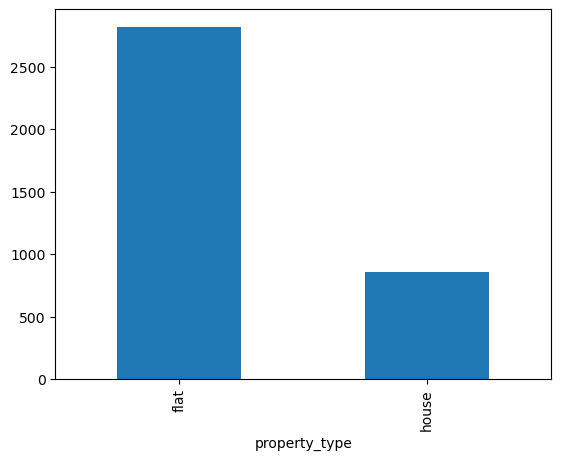

In [20]:
df['property_type'].value_counts().plot(kind='bar',)

Observations

1. Flat is almost 2.5 times more than houses in the data
2. No missing value in the data

Society column


In [23]:
df['society'].info()

<class 'pandas.core.series.Series'>
Index: 3678 entries, 0 to 3801
Series name: society
Non-Null Count  Dtype 
--------------  ----- 
3677 non-null   object
dtypes: object(1)
memory usage: 57.5+ KB


In [24]:
df['society'].value_counts()

society
independent                                          486
tulip violet                                          75
ss the leaf                                           73
dlf new town heights                                  42
shapoorji pallonji joyville gurugram                  42
signature global park                                 35
shree vardhman victoria                               34
smart world orchard                                   32
emaar mgf emerald floors premier                      32
paras dews                                            31
dlf the ultima                                        31
dlf regal gardens                                     30
m3m woodshire                                         30
shree vardhman flora                                  29
smart world gems                                      28
la vida by tata housing                               28
signature global solera                               27
godrej nature plus     

In [25]:
df[df['society'] != 'independent']['society'].value_counts(normalize = True).cumsum().head(75)

society
tulip violet                            0.023504
ss the leaf                             0.046380
shapoorji pallonji joyville gurugram    0.059542
dlf new town heights                    0.072704
signature global park                   0.083673
shree vardhman victoria                 0.094328
emaar mgf emerald floors premier        0.104356
smart world orchard                     0.114384
dlf the ultima                          0.124099
paras dews                              0.133814
m3m woodshire                           0.143215
dlf regal gardens                       0.152617
shree vardhman flora                    0.161705
smart world gems                        0.170479
la vida by tata housing                 0.179254
godrej nature plus                      0.187715
signature global solera                 0.196177
bptp terra                              0.204011
tata primanti                           0.211532
vatika gurgaon                          0.219054
experion the

In [26]:
society_counts = df['society'].value_counts()

In [27]:
# Frequency distribution for societies
frequency_bins = {
    'Very High (>100)' : (society_counts > 100).sum(),
    'High (50-100)' : ((society_counts >= 50) & (society_counts <=100)).sum(),
    'Average (10-49)' : ((society_counts <=49) & (society_counts >= 10)).sum(),
    "Low (2-9)": ((society_counts > 1) & (society_counts < 10)).sum(),
    "Very Low (1)": (society_counts == 1).sum()
}
frequency_bins

{'Very High (>100)': 1,
 'High (50-100)': 2,
 'Average (10-49)': 92,
 'Low (2-9)': 273,
 'Very Low (1)': 308}

<Axes: xlabel='society'>

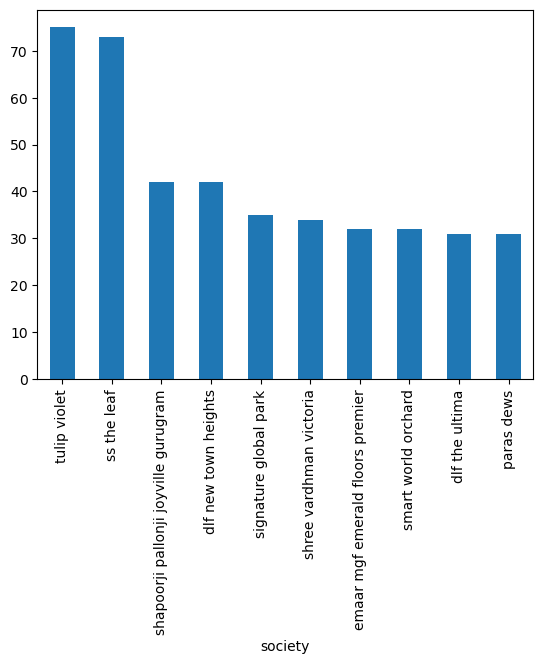

In [28]:
# Top 10 societies

df[df['society'] != 'independent']['society'].value_counts().head(10).plot(kind = 'bar')

In [29]:
df['society'].isnull().sum()

1

In [30]:
df['society'].value_counts().shape

(676,)

In [31]:
df[df['society'].isnull()]

society property_type     sector  price  price_per_sqft    area  \
229     NaN          flat  sector 78    0.6          3692.0  1625.0   

                           areaWithType  bedRoom  bathroom balcony  floorNum  \
229  Built Up area: 1625 (150.97 sq.m.)        2         2       0       NaN   

    facing       agePossession  super_built_up_area  built_up_area  \
229    NaN  Under Construction                  NaN         1625.0   

     carpet_area  study room  servant room  store room  puja room  others  \
229          NaN           0             0           0          0       0   

     furnishing_type  luxury_score  
229                0             0

OBSERVATIONS:

1. 486 socity belongs to independent society(13%)
2. one Row has missing value (planning to drop that)
3. Too many categories so high cardinality column
4. Top 75 socities comprise 50% data and rest belong to other 600 socities
5. Total 676 unique socities

### Sector Column

In [34]:
df['sector'].value_counts().shape

(116,)

In [35]:
df['sector'].value_counts()

sector
sohna road road               165
sector 85                     108
sector 102                    107
sector 92                     100
sector 69                      93
sector 90                      89
sector 81                      87
sector 65                      87
sector 109                     84
sector 79                      76
sector 104                     69
sector 83                      68
sector 43                      65
sector 50                      64
sector 86                      63
sector 37d                     63
sector 2                       62
sector 95                      62
sector 107                     60
sector 108                     59
sector 89                      57
sector 48                      55
sector 56                      55
sector 70a                     54
sector 37c                     51
sector 70                      50
sector 4                       49
sector 26                      49
sector 84                      49
sector 

In [36]:
df['sector'].isnull().sum()

0

In [37]:
df['sector'].value_counts(normalize = True).head(25).cumsum()

sector
sohna road road    0.044861
sector 85          0.074225
sector 102         0.103317
sector 92          0.130506
sector 69          0.155791
sector 90          0.179989
sector 81          0.203643
sector 65          0.227297
sector 109         0.250136
sector 79          0.270799
sector 104         0.289560
sector 83          0.308048
sector 43          0.325721
sector 50          0.343121
sector 86          0.360250
sector 37d         0.377379
sector 2           0.394236
sector 95          0.411093
sector 107         0.427406
sector 108         0.443448
sector 89          0.458945
sector 48          0.473899
sector 56          0.488853
sector 70a         0.503535
sector 37c         0.517401
Name: proportion, dtype: float64

<Axes: xlabel='sector'>

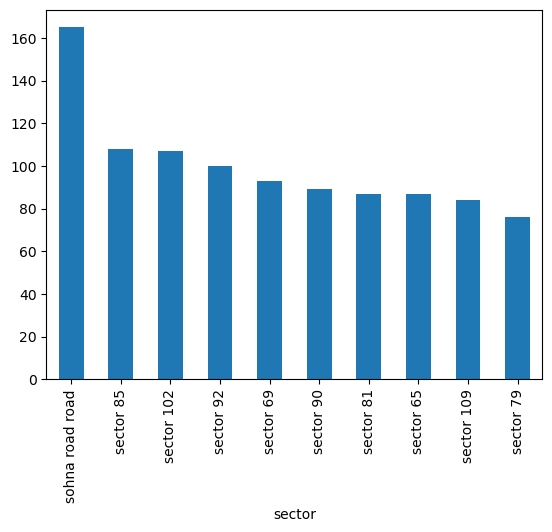

In [38]:
# top 10 sectors
df['sector'].value_counts().head(10).plot(kind = 'bar')

In [39]:
# Frequency distribution for sectors
sector_counts = df['sector'].value_counts()

sector_frequency_bins = {
    "Very High (>100)": (sector_counts > 100).sum(),
    "High (50-100)": ((sector_counts >= 50) & (sector_counts <= 100)).sum(),
    "Average (10-49)": ((sector_counts >= 10) & (sector_counts < 50)).sum(),
    "Low (2-9)": ((sector_counts > 1) & (sector_counts < 10)).sum(),
    "Very Low (1)": (sector_counts == 1).sum()
}

sector_frequency_bins

{'Very High (>100)': 3,
 'High (50-100)': 23,
 'Average (10-49)': 64,
 'Low (2-9)': 25,
 'Very Low (1)': 1}

In [40]:
df[df['sector'] == 'sector 37']

society property_type     sector  price  price_per_sqft    area  \
919  ats tourmaline          flat  sector 37    1.4          8000.0  1750.0   

                                                                       areaWithType  \
919  Super Built up area 1750(162.58 sq.m.)Built Up area: 1466 sq.ft. (136.2 sq.m.)   

     bedRoom  bathroom balcony  floorNum facing   agePossession  \
919        3         3      3+       5.0   East  Relatively New   

     super_built_up_area  built_up_area  carpet_area  study room  \
919               1750.0         1466.0          NaN           0   

     servant room  store room  puja room  others  furnishing_type  \
919             0           0          0       0                0   

     luxury_score  
919            44

### Observations for sector column

1. 116 unique sectors
2. No missing value
3. top 25 sectors contains 50 % Rows
4. Obviously a high cardinality column

### Price Column

In [43]:
df['price'].value_counts()

price
1.25     80
1.20     64
1.50     64
0.90     63
1.10     62
1.40     60
1.30     57
0.95     52
2.00     52
1.60     48
1.75     47
1.00     47
1.35     46
1.70     43
0.75     43
0.80     43
1.55     42
0.50     42
0.85     41
1.80     41
1.65     40
1.90     39
1.15     36
3.50     34
2.50     34
2.20     34
0.60     34
1.45     33
0.40     33
0.65     33
2.10     32
0.45     31
0.70     30
1.05     28
2.25     27
3.00     24
2.35     24
0.55     24
5.00     24
1.85     24
6.50     23
0.35     23
5.50     22
2.40     20
6.00     19
4.00     18
2.30     18
3.25     18
3.40     17
0.30     17
4.50     17
0.32     17
2.80     16
0.42     16
2.65     16
7.00     16
0.28     16
2.60     16
0.38     16
1.95     15
0.78     15
2.15     15
1.38     15
8.00     15
2.45     15
0.92     15
8.50     14
2.75     14
4.25     14
2.70     14
0.82     14
0.88     13
6.75     13
1.32     13
0.36     13
0.98     12
0.27     12
0.26     12
0.56     12
0.99     12
2.55     12
0.87     12
1.42     1

In [44]:
df['price'].isnull().sum()

17

In [45]:
df['price'].describe()

count    3661.000000
mean        2.533204
std         2.980346
min         0.070000
25%         0.950000
50%         1.520000
75%         2.750000
max        31.500000
Name: price, dtype: float64

<Axes: xlabel='price', ylabel='Count'>

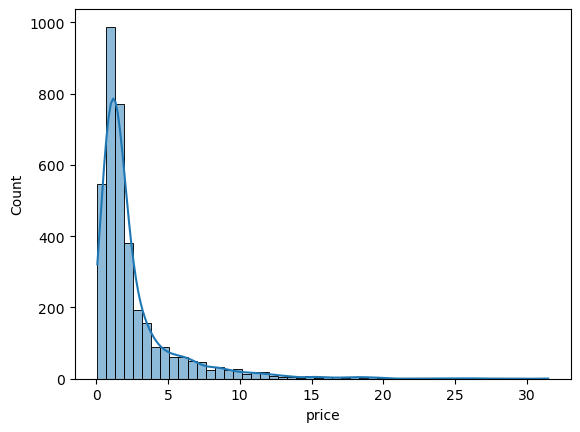

In [46]:
sns.histplot(df['price'], kde = True, bins = 50)

<Axes: xlabel='price'>

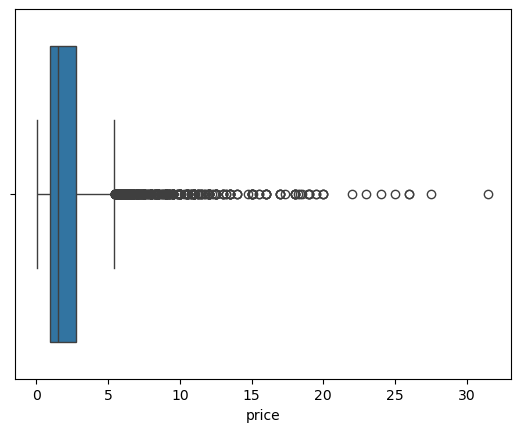

In [47]:
sns.boxplot(x = df['price'])

In [87]:
# Skewness and kurtosis
skewness = df['price'].skew()
kurtosis = df['price'].kurt()
print(skewness)
print(kurtosis)

3.2796031135926156
14.937193599870733


In [92]:
# Quantile analysis
quantiles = df['price'].quantile([0.01, 0.05, 0.95, 0.99])
quantiles

0.01     0.25
0.05     0.37
0.95     8.50
0.99    15.26
Name: price, dtype: float64

In [110]:
# identifying potential outliers using IQR Method

Q1 = df['price'].describe()['25%']
Q3 = df['price'].describe()['75%']
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound,lower_bound

(5.45, -1.7500000000000002)

In [118]:
# Separating Outiers

outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]
outliers.shape

(425, 23)

In [122]:
outliers['price'].describe()

count    425.000000
mean       9.235624
std        4.065259
min        5.460000
25%        6.460000
50%        8.000000
75%       10.750000
max       31.500000
Name: price, dtype: float64

<Axes: xlabel='price'>

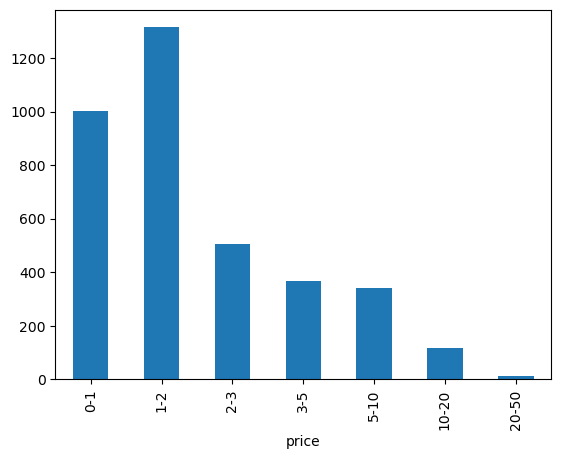

In [125]:
# Price binning to see distribution

bins = [0, 1, 2, 3, 5, 10, 20, 50]
bin_labels = ["0-1", "1-2", "2-3", "3-5", "5-10", "10-20", "20-50"]
pd.cut(df['price'], bins=bins, labels=bin_labels, right=False).value_counts().sort_index().plot(kind='bar')


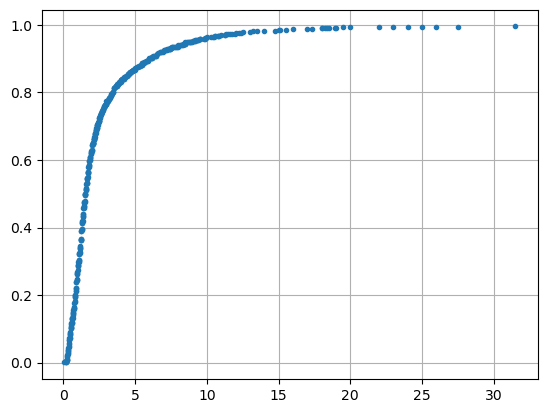

In [127]:
# ecdf Plot 
ecdf = df['price'].value_counts().sort_index().cumsum() / len(df['price'])
plt.plot(ecdf.index, ecdf, marker='.', linestyle='none')
plt.grid()

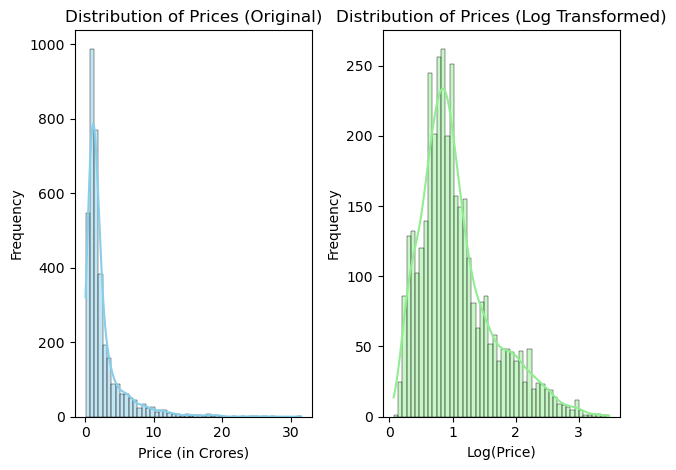

In [141]:
# Distribution plot without log transformation
plt.subplot(1, 2, 1)
sns.histplot(df['price'], kde=True, bins=50, color='skyblue')
plt.title('Distribution of Prices (Original)')
plt.xlabel('Price (in Crores)')
plt.ylabel('Frequency')

# Distribution plot with log transformation
plt.subplot(1, 2, 2)
sns.histplot(np.log1p(df['price']), kde=True, bins=50, color='lightgreen')
plt.title('Distribution of Prices (Log Transformed)')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [143]:
# Skewness and kurtosis after taking log1p
skewness = np.log1p(df['price']).skew()
kurtosis = np.log1p(df['price']).kurt()

print(skewness,kurtosis)

1.0744639367303175 0.9654719464182522


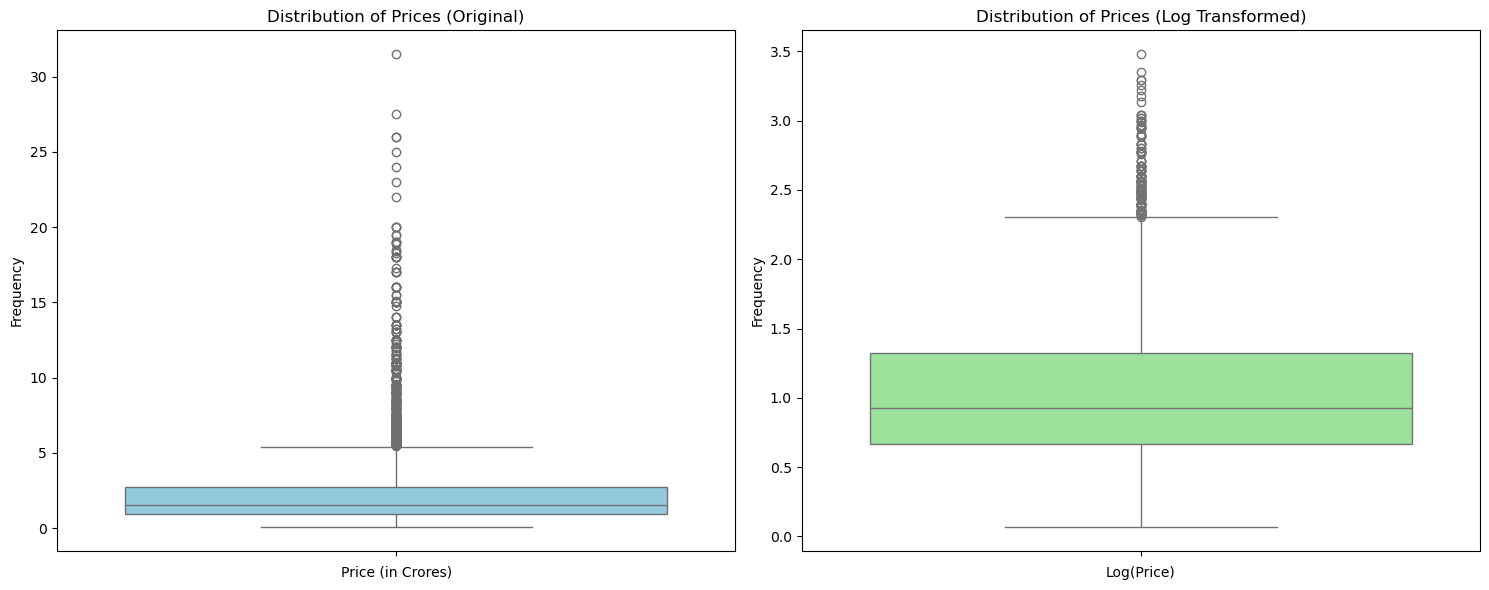

In [145]:
plt.figure(figsize=(15, 6))

# Distribution plot without log transformation
plt.subplot(1, 2, 1)
sns.boxplot(df['price'], color='skyblue')
plt.title('Distribution of Prices (Original)')
plt.xlabel('Price (in Crores)')
plt.ylabel('Frequency')

# Distribution plot with log transformation
plt.subplot(1, 2, 2)
sns.boxplot(np.log1p(df['price']), color='lightgreen')
plt.title('Distribution of Prices (Log Transformed)')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### Observations for Price Column

1. 17 missing values
2. Mean price is 2.5 crores
3. Median price is 1.55 crores (Mean and Median is having difference, May be Mean shifted due to
4. The plot is right skewed
5. Outliers are present (more than 10-15 crores we can treat as outliers as there are only a few points like that.
6. The kurtosis value is approximately 14.93. A kurtosis value greater than 3 indicates a distribution with heavier tails and more outliers compared to a normal distribution.
7. Quantile Analysis:

- 1% Quantile: Only 1% of properties are priced below 0.25 crores.
- 5% Quantile: 5% of properties are priced below 0.37 crores.
- 95% Quantile: 95% of properties are priced below 8.5 crores.
- 99% Quantile: 99% of properties are priced below 15.26 crores, indicating that very few properties are priced above this value.

8. Outiliers analysis
   - there are 425 potential outliers
   - minm is 5.46 crores and max is 31 crores
   - Mean of outliers is 9.23 crores and median 8 crores

9. The majority of flats are in the range 0-1 and 1-2 crores, Significantly less after 10 crores

10. Graph more normal after taking log1p as the graph was right skewed

11. After taking log1p Skewness and kurtosis both dropped

### Price Per Sqft Column

In [149]:
df.sample()

society property_type     sector  price  price_per_sqft    area  \
1099  vatika city          flat  sector 49   1.79         12785.0  1400.0   

                          areaWithType  bedRoom  bathroom balcony  floorNum  \
1099  Carpet area: 1400 (130.06 sq.m.)        3         3       3       9.0   

     facing agePossession  super_built_up_area  built_up_area  carpet_area  \
1099    NaN  Old Property                  NaN            NaN       1400.0   

      study room  servant room  store room  puja room  others  \
1099           0             1           0          0       0   

      furnishing_type  luxury_score  
1099                0            38

In [151]:
df['price_per_sqft'].value_counts()

price_per_sqft
10000.0     27
8000.0      19
5000.0      17
12500.0     14
11111.0     13
22222.0     13
6666.0      13
8333.0      12
7500.0      12
33333.0     11
6000.0      11
9000.0       9
12000.0      9
8461.0       9
8928.0       7
7000.0       7
7407.0       7
26235.0      6
11428.0      6
23333.0      6
11500.0      6
8888.0       6
26667.0      6
6578.0       6
4444.0       6
31481.0      6
37037.0      6
9210.0       5
13333.0      5
5500.0       5
13750.0      5
7641.0       5
12222.0      5
14242.0      5
5600.0       5
11666.0      5
15000.0      5
8500.0       5
8205.0       5
16000.0      5
5556.0       5
6500.0       5
15384.0      5
4615.0       5
23148.0      5
9444.0       5
30556.0      5
8784.0       5
7692.0       5
8571.0       5
9230.0       5
14418.0      4
13913.0      4
5660.0       4
7496.0       4
8445.0       4
8108.0       4
11574.0      4
14000.0      4
8787.0       4
4854.0       4
7058.0       4
9822.0       4
7812.0       4
8358.0       4
24691.0   

In [153]:
df['price_per_sqft'].describe()

count      3661.00000
mean      13890.39115
std       23207.30521
min           4.00000
25%        6815.00000
50%        9020.00000
75%       13878.00000
max      600000.00000
Name: price_per_sqft, dtype: float64

In [157]:
df['price_per_sqft'].isnull().sum()

17

<Axes: xlabel='price_per_sqft', ylabel='Count'>

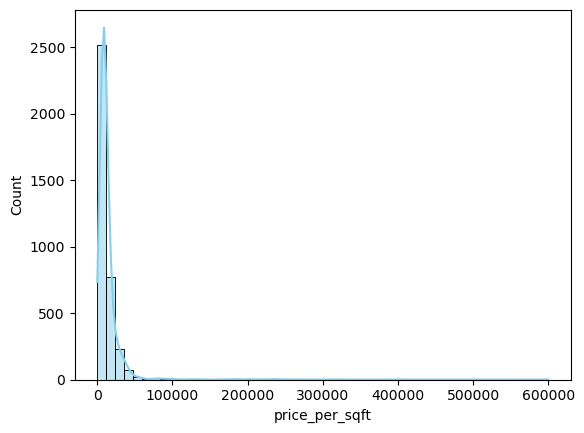

In [163]:
sns.histplot(df['price_per_sqft'], bins=50, color='skyblue', kde=True)

<Axes: ylabel='price_per_sqft'>

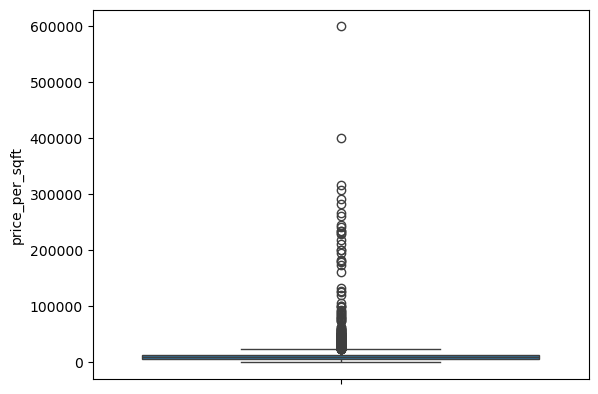

In [165]:
sns.boxplot(df['price_per_sqft'])

### Observation of price_per_sqft column

1. Mean is almost 14000, median is 9000
2. outliers present
3. 17 null values
4. Right skewed data

# bedRoom

In [172]:
df['bedRoom'].value_counts()

bedRoom
3     1496
2      943
4      660
5      210
1      124
6       74
9       41
8       30
7       28
12      28
10      20
16      12
13       4
18       2
19       2
20       1
14       1
11       1
21       1
Name: count, dtype: int64

In [204]:
df['bedRoom'].isnull().sum()

0

<Axes: xlabel='bedRoom'>

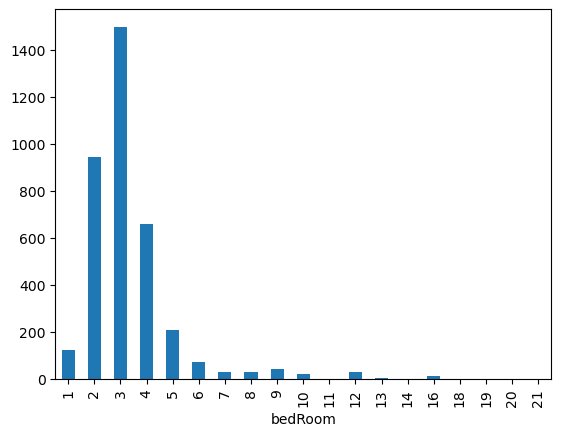

In [176]:
df['bedRoom'].value_counts().sort_index().plot(kind = 'bar')

<Axes: ylabel='proportion'>

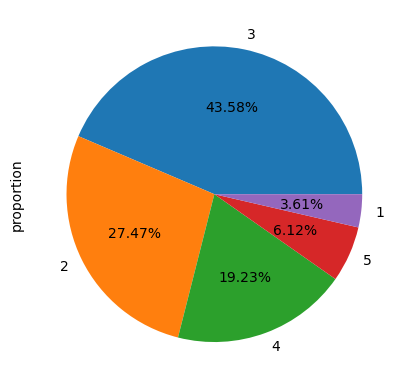

In [180]:
df['bedRoom'].value_counts(normalize = True).head().plot(kind = 'pie',autopct='%0.2f%%')

# Observation for bedroom column
1. 43.58 % rows has 3 bedrooms
2. 2,3,4 combined is contaning 90% rows
3. No missing value

# bathroom column

In [196]:
df['bathroom'].value_counts()

bathroom
3     1077
2     1048
4      820
5      294
1      156
6      117
9       41
7       40
8       25
12      22
10       9
16       8
18       4
13       4
11       4
20       3
17       3
14       2
21       1
Name: count, dtype: int64

In [207]:
df['bathroom'].isnull().sum()

0

<Axes: xlabel='bathroom'>

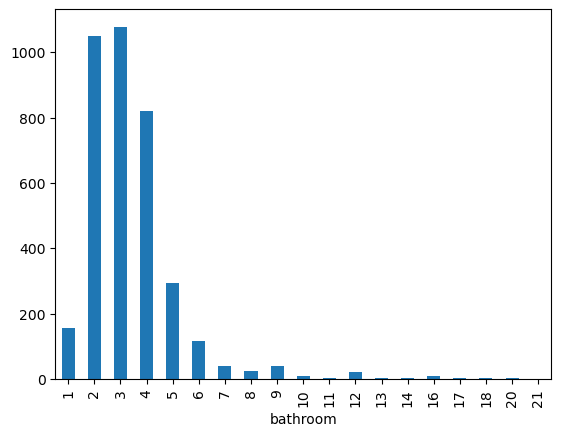

In [194]:
df['bathroom'].value_counts().sort_index().plot(kind = 'bar')

<Axes: ylabel='proportion'>

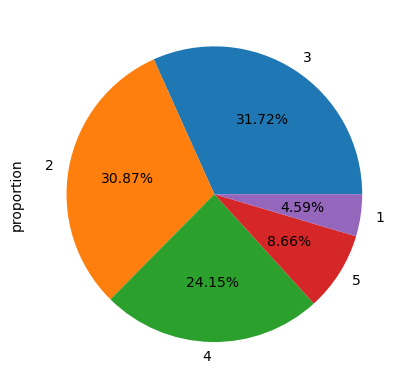

In [192]:
df['bathroom'].value_counts(normalize = True).head().plot(kind = 'pie',autopct='%0.2f%%')

# Observation for bathroom column
1. 2,3,4 combined is contaning 86.5 % rows
2. No missing value

# balcony column


In [210]:
df['balcony'].isnull().sum()

0

In [213]:
df['balcony'].value_counts()

balcony
3+    1172
3     1075
2      884
1      365
0      182
Name: count, dtype: int64

<Axes: xlabel='balcony'>

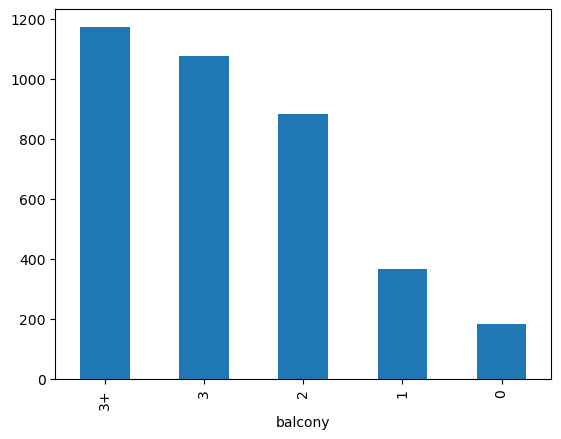

In [215]:
df['balcony'].value_counts().plot(kind='bar')


<Axes: ylabel='proportion'>

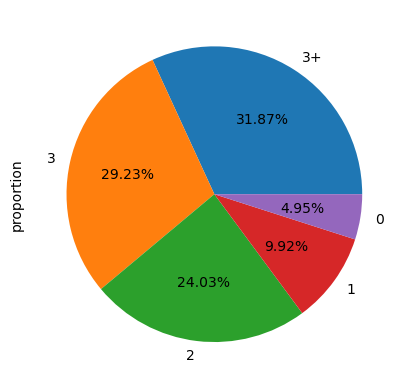

In [217]:
df['balcony'].value_counts(normalize=True).head().plot(kind='pie',autopct='%0.2f%%')

# Observation for balcony column
1. 85 % rows have 2,3 , 3+ balconies
2. No missing value

# Floor num column

In [234]:
df['floorNum'].isnull().sum()

19

In [236]:
df['floorNum'].describe()

count    3659.000000
mean        6.799125
std         6.011865
min         0.000000
25%         2.000000
50%         5.000000
75%        10.000000
max        51.000000
Name: floorNum, dtype: float64

<Axes: xlabel='floorNum'>

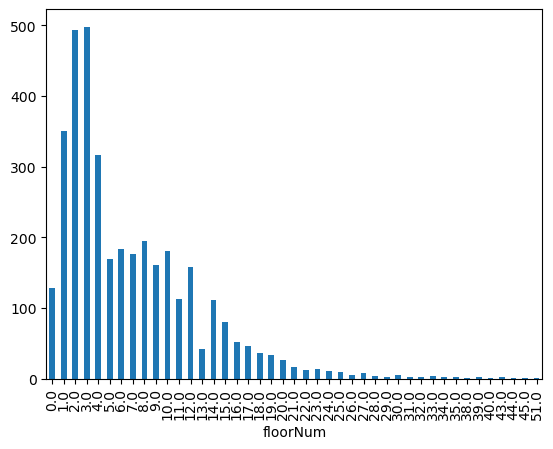

In [238]:
df['floorNum'].value_counts().sort_index().plot(kind='bar')

<Axes: ylabel='floorNum'>

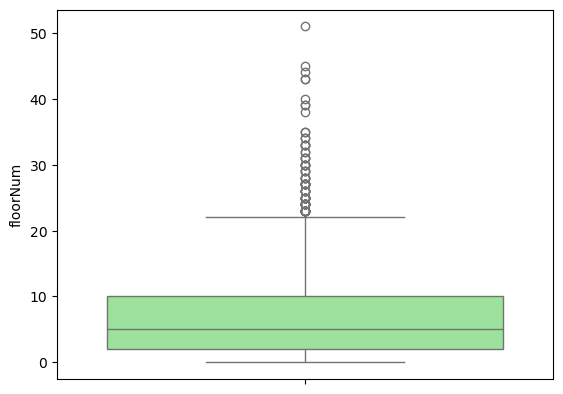

In [240]:
sns.boxplot(df['floorNum'], color='lightgreen')

### observations for floorNum
1. 19 Missing value
2. Potential Outliers

# Facing column

In [243]:
df['facing'].isnull().sum()

1045

In [245]:
df['facing'].fillna('NA',inplace=True)

/var/folders/3v/pb26c2zj6_v2h3f13gtgqw3w0000gn/T/ipykernel_77655/3692945726.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['facing'].fillna('NA',inplace=True)


In [247]:
df['facing'].value_counts()


facing
NA            1045
East           623
North-East     623
North          387
West           249
South          231
North-West     194
South-East     173
South-West     153
Name: count, dtype: int64

### Observation for facing column
1. Majority rows belong to NA column ie, 1045 missing values
2. 1246 rows are either East or North East

# age possesision

In [250]:
df['agePossession'].isnull().sum()

0

In [252]:
df['agePossession'].value_counts()

agePossession
Relatively New        1646
New Property           594
Moderately Old         563
Undefined              306
Old Property           303
Under Construction     266
Name: count, dtype: int64

### Observation for age possession column
1. 306 rows belong to undefined i.e, missing values

# Areas columns


In [255]:
# super built up area
df['super_built_up_area'].isnull().sum()

1802

In [257]:
df['super_built_up_area'].describe()


count     1876.000000
mean      1924.930997
std        764.083802
min         89.000000
25%       1478.750000
50%       1828.000000
75%       2215.000000
max      10000.000000
Name: super_built_up_area, dtype: float64

<Axes: xlabel='super_built_up_area', ylabel='Count'>

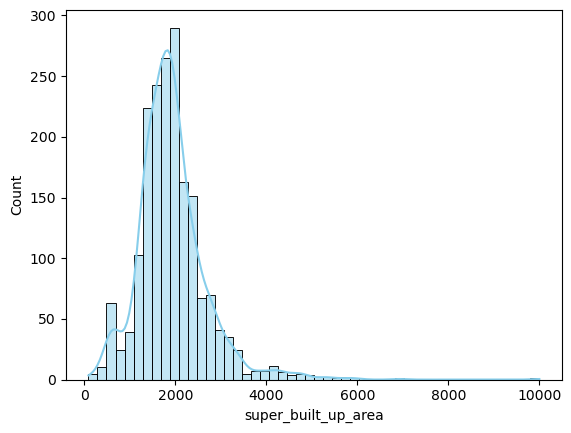

In [259]:
sns.histplot(df['super_built_up_area'].dropna(), bins=50, color='skyblue', kde=True)

<Axes: ylabel='super_built_up_area'>

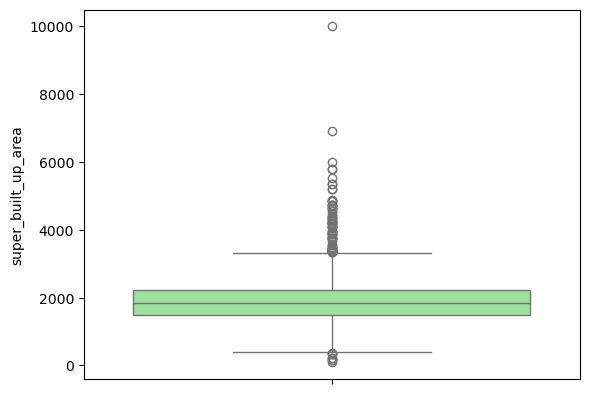

In [261]:
sns.boxplot(df['super_built_up_area'].dropna(), color='lightgreen')

### observations for Super built up area
1. 1802 missing values
2. distribution almost normal
3. Potential outliers

In [263]:
# built up area
df['built_up_area'].isnull().sum()

1988

In [265]:
df['built_up_area'].describe()

count      1690.000000
mean       2379.665975
std       17942.894281
min           2.000000
25%        1100.000000
50%        1650.000000
75%        2400.000000
max      737147.000000
Name: built_up_area, dtype: float64

<Axes: xlabel='built_up_area', ylabel='Count'>

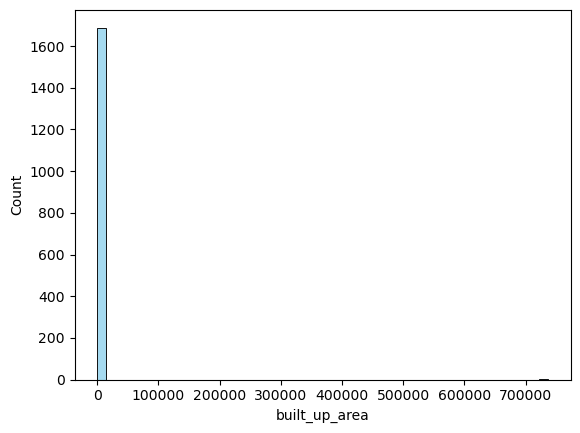

In [267]:
sns.histplot(df['built_up_area'].dropna(), bins=50, color='skyblue', kde=False)

<Axes: ylabel='built_up_area'>

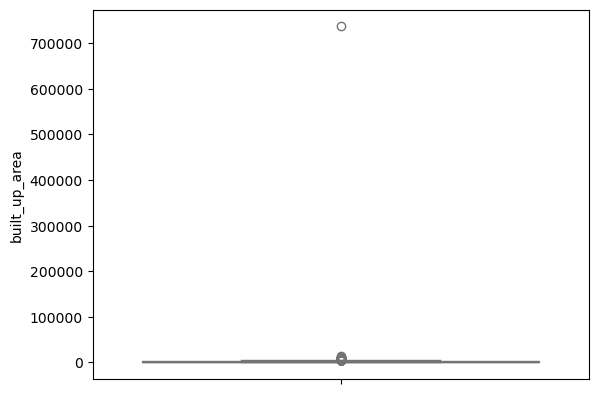

In [269]:
sns.boxplot(df['built_up_area'].dropna(), color='lightgreen')

### Observations for built up area
1. 1988 missing values
2. Min is 2 and max is 7lakhs so both are potential outliers
3. distribution not clear due to presence of large outliers

In [271]:
# carpet area
df['carpet_area'].isnull().sum()

1806

In [273]:
df['carpet_area'].describe()

count      1872.000000
mean       2529.179507
std       22799.836449
min          15.000000
25%         843.000000
50%        1300.000000
75%        1790.000000
max      607936.000000
Name: carpet_area, dtype: float64

<Axes: xlabel='carpet_area', ylabel='Count'>

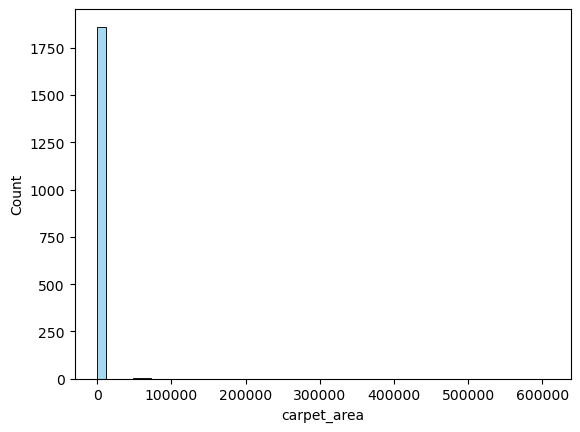

In [275]:
sns.histplot(df['carpet_area'].dropna(), bins=50, color='skyblue', kde=False)

<Axes: ylabel='carpet_area'>

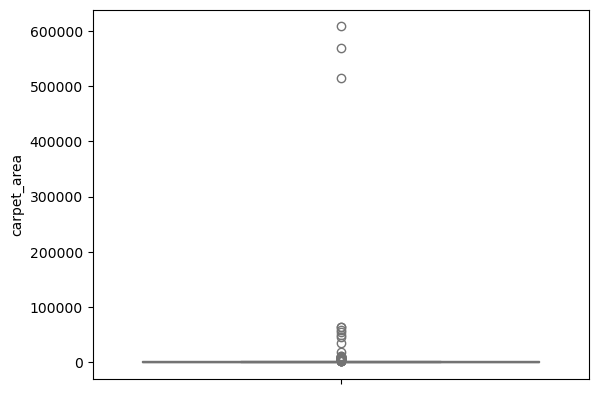

In [277]:
sns.boxplot(df['carpet_area'].dropna(), color='lightgreen')

### Observation for carpet area column
1. 1806 missing values
2. Clearly outliers are present with min as 15 and max is 6 lakhs so we need to handle them

In [282]:
df.sample()

society property_type      sector  price  price_per_sqft  \
1278  puri emerald bay          flat  sector 104   1.58          9117.0   

        area                            areaWithType  bedRoom  bathroom  \
1278  1733.0  Super Built up area 1700(157.94 sq.m.)        2         3   

     balcony  floorNum      facing   agePossession  super_built_up_area  \
1278       3      11.0  North-East  Relatively New               1700.0   

      built_up_area  carpet_area  study room  servant room  store room  \
1278            NaN          NaN           0             1           0   

      puja room  others  furnishing_type  luxury_score  
1278          0       0                0           101

# additional rooms column

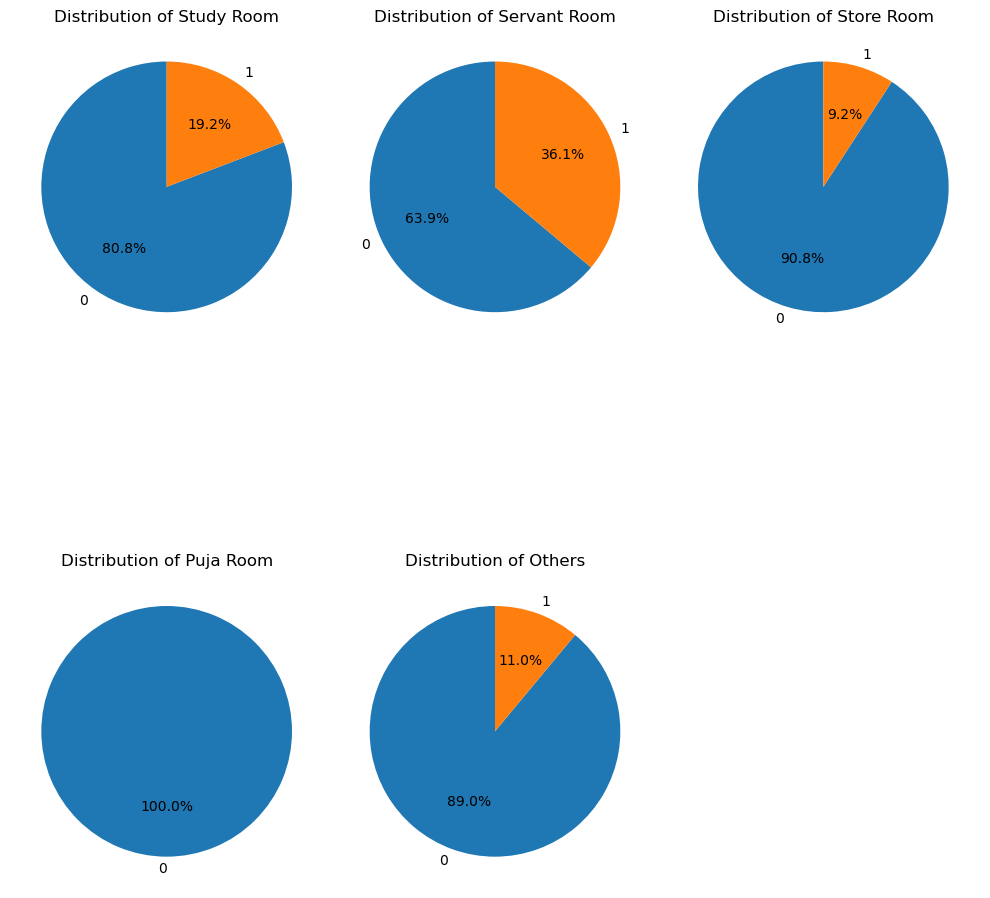

In [315]:
plt.figure(figsize=(10, 12))

# Create a subplot of pie charts for each room type
for idx, room in enumerate(['study room','servant room','store room','puja room','others'], 1):
    ax = plt.subplot(2, 3, idx)
    df[room].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, ax=ax)
    plt.title(f'Distribution of {room.title()}')
    plt.ylabel('')

plt.tight_layout()
plt.show()

# Furnishing Type

In [288]:
df['furnishing_type'].value_counts()

furnishing_type
0    2436
1    1039
2     203
Name: count, dtype: int64

<Axes: ylabel='count'>

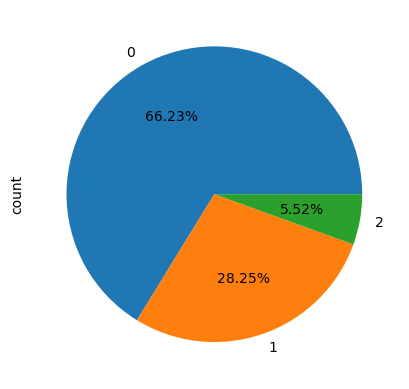

In [290]:
df['furnishing_type'].value_counts().plot(kind='pie',autopct='%0.2f%%')

# Luxury score

In [293]:
df['luxury_score'].isnull().sum()

0

In [295]:
df['luxury_score'].describe()


count    3678.000000
mean       71.500000
std        53.057651
min         0.000000
25%        31.000000
50%        59.000000
75%       110.000000
max       174.000000
Name: luxury_score, dtype: float64

<Axes: xlabel='luxury_score', ylabel='Count'>

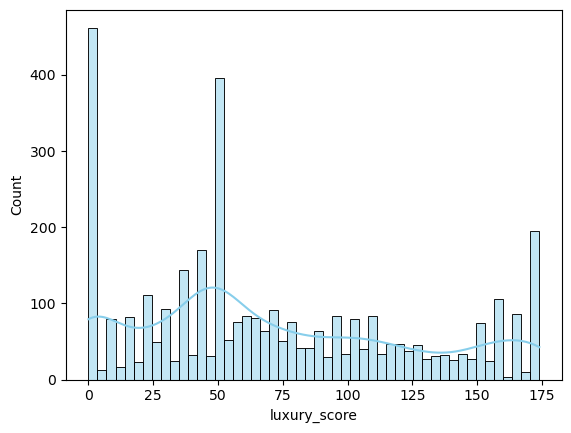

In [297]:
sns.histplot(df['luxury_score'], bins=50, color='skyblue', kde=True)

<Axes: ylabel='luxury_score'>

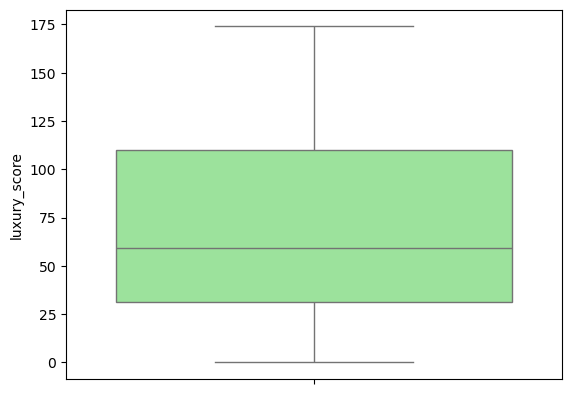

In [299]:
sns.boxplot(df['luxury_score'], color='lightgreen')

# Pandas Profiler

In [323]:
!pip install pandas-profiling


  Using cached joblib-1.1.1-py2.py3-none-any.whl.metadata (5.2 kB)
  Using cached visions-0.7.4-py3-none-any.whl.metadata (5.9 kB)
Using cached visions-0.7.4-py3-none-any.whl (102 kB)
Using cached joblib-1.1.1-py2.py3-none-any.whl (309 kB)
  Attempting uninstall: joblib
    Found existing installation: joblib 1.4.2
    Uninstalling joblib-1.4.2:
      Successfully uninstalled joblib-1.4.2
  Attempting uninstall: visions
    Found existing installation: visions 0.7.6
    Uninstalling visions-0.7.6:
      Successfully uninstalled visions-0.7.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scikit-learn 1.5.1 requires joblib>=1.2.0, but you have joblib 1.1.1 which is incompatible.
ydata-profiling 4.12.1 requires visions[type_image_path]<0.7.7,>=0.7.5, but you have visions 0.7.4 which is incompatible.


In [331]:
import pandas as pd
from pandas_profiling import ProfileReport

# Load your dataset
df1 = df.drop_duplicates()

# Create the ProfileReport object
profile = ProfileReport(df1, title='Pandas Profiling Report', explorative=True)

# Generate the report
profile.to_file("Pandas_Profiler_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Multivariate Analysis

In [334]:
pd.set_option('display.max_columns', None)

In [336]:
df = df.drop_duplicates()

<Axes: xlabel='property_type', ylabel='price'>

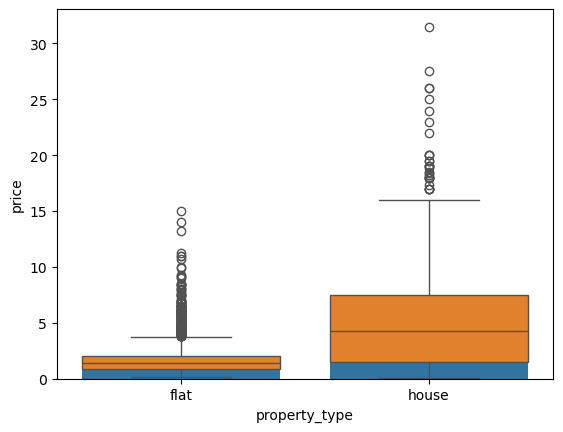

In [340]:
# Property type vs Price
sns.barplot(x=df['property_type'], y=df['price'], estimator=np.median)

<Axes: xlabel='property_type', ylabel='price'>

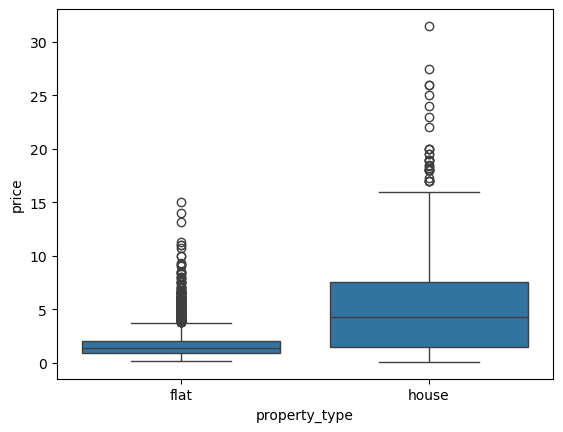

In [342]:
sns.boxplot(x=df['property_type'], y=df['price'])

<Axes: xlabel='property_type', ylabel='built_up_area'>

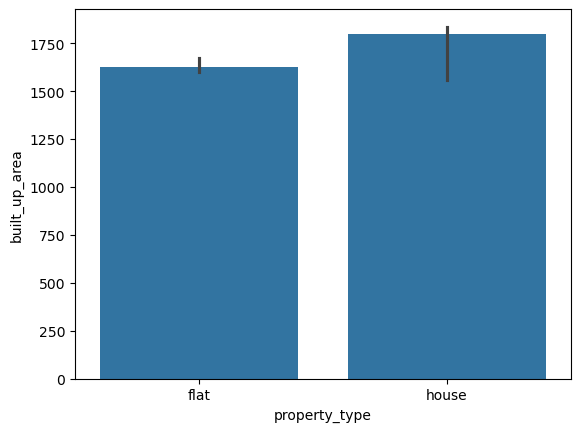

In [344]:
# Property Type vs Area

sns.barplot(x=df['property_type'], y=df['built_up_area'], estimator=np.median)

<Axes: xlabel='property_type', ylabel='built_up_area'>

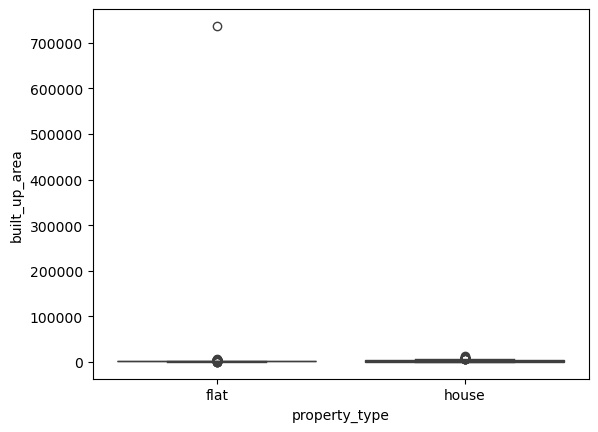

In [346]:
sns.boxplot(x=df['property_type'], y=df['built_up_area'])

In [348]:
# removing that crazy outlier
df = df[df['built_up_area'] != 737147]

<Axes: xlabel='property_type', ylabel='built_up_area'>

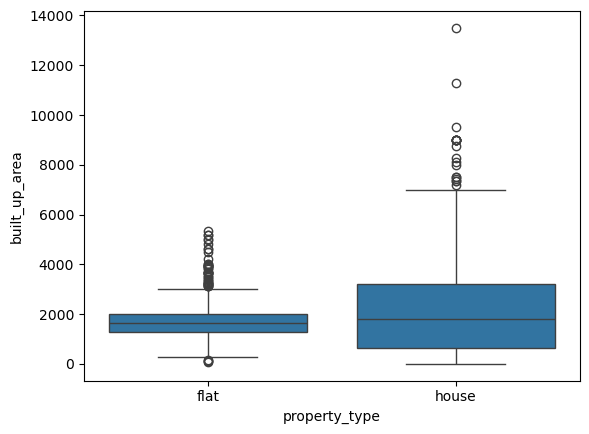

In [350]:
sns.boxplot(x=df['property_type'], y=df['built_up_area'])

<Axes: xlabel='property_type', ylabel='price_per_sqft'>

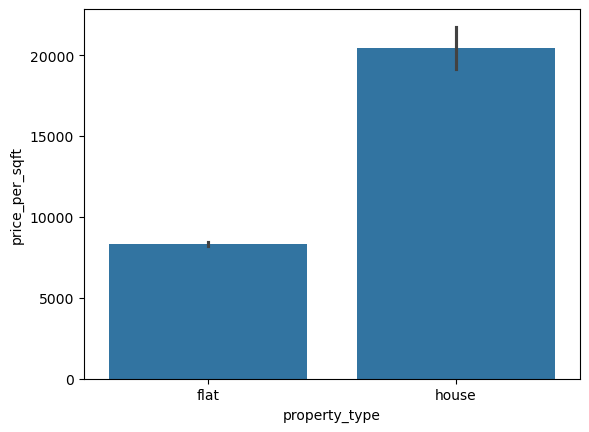

In [352]:
# Property TYpe vs price per sqft

sns.barplot(x=df['property_type'], y=df['price_per_sqft'], estimator=np.median)

<Axes: xlabel='property_type', ylabel='price_per_sqft'>

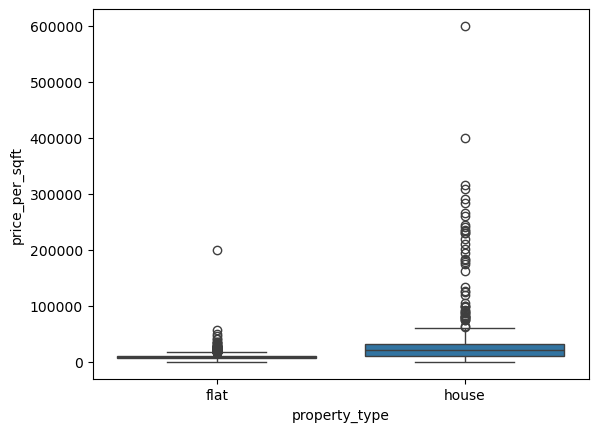

In [354]:
sns.boxplot(x=df['property_type'], y=df['price_per_sqft'])

In [356]:
# check outliers
df[df['price_per_sqft'] > 100000][['property_type','society','sector','price','price_per_sqft','area','areaWithType', 'super_built_up_area', 'built_up_area', 'carpet_area']]

property_type                      society     sector  price  \
330          house          huda plot sector 38  sector 38   4.30   
453           flat           ambience caitriona  sector 24  14.00   
492          house                  independent  sector 57   8.00   
558          house                    rk excelo  sector 12   0.60   
570          house         bhim nagar, sector 6   sector 6   0.85   
844          house                        ansal  sector 43   1.85   
1078         house            vatika india next  sector 82   7.00   
1299         house                  independent  sector 17   3.50   
1366         house           vipul tatvam villa  sector 48   7.25   
1372         house  unitech nirvana birch court  sector 50   7.10   
1380         house                  independent  sector 55   1.45   
1473         house       dlf city plots phase 2  sector 25  10.00   
1511         house               uppal southend  sector 49   6.75   
1722         house                  independent  sector 23   2.80   
1800         house                  independent  sector 38   8.00   
1845         house                dlf the grove  sector 54   5.70   
1886         house                  independent  sector 12   3.50   
1912         house       dlf city plots phase 2  sector 25  10.50   
2127         house     unitech uniworld resorts  sector 33  10.00   
2246         house                  independent  sector 28   4.50   
2352         house     unitech uniworld resorts  sector 33   9.50   
2467         house       unitech deerwood chase  sector 50   8.45   
2772         house                  independent  sector 24  10.00   
3105         house                  independent  sector 12   6.00   
3137         house                  independent   sector 4   0.60   
3155         house                   ardee city  sector 52   5.50   
3300         house                  independent  sector 54   3.75   
3415         house         eros rosewood villas  sector 49   2.75   
3793         house       emaar the palm springs  sector 54  24.00   

      price_per_sqft   area  \
330         245398.0  175.0   
453         200000.0  700.0   
492         266666.0  300.0   
558         120000.0   50.0   
570         126865.0   67.0   
844         308333.0   60.0   
1078        194444.0  360.0   
1299        218750.0  160.0   
1366        201388.0  360.0   
1372        283333.0  251.0   
1380        241666.0   60.0   
1473        400000.0  250.0   
1511        290948.0  232.0   
1722        161849.0  173.0   
1800        230547.0  347.0   
1845        211111.0  270.0   
1886        133079.0  263.0   
1912        261194.0  402.0   
2127        181818.0  550.0   
2246        125000.0  360.0   
2352        173992.0  546.0   
2467        235376.0  359.0   
2772        229885.0  435.0   
3105        315789.0  190.0   
3137        105263.0   57.0   
3155        183333.0  300.0   
3300        234375.0  160.0   
3415        178571.0  154.0   
3793        600000.0  400.0   

                                                                                                    areaWithType  \
330                                            Plot area 163(15.14 sq.m.)Built Up area: 145 sq.ft. (13.47 sq.m.)   
453                                                                             Built Up area: 700 (65.03 sq.m.)   
492                                                                                   Plot area 300(27.87 sq.m.)   
558             Plot area 50(4.65 sq.m.)Built Up area: 30 sq.ft. (2.79 sq.m.)Carpet area: 15 sq.ft. (1.39 sq.m.)   
570                                                                                     Plot area 67(6.22 sq.m.)   
844                                                                                     Plot area 60(5.57 sq.m.)   
1078  Plot area 360(33.45 sq.m.)Built Up area: 3900 sq.ft. (362.32 sq.m.)Carpet area: 3743 sq.ft. (347.74 sq.m.)   
1299                                                                       

In [358]:
# Observation (will have to fix this oulier values), May be some problem in unit conversion

<Axes: xlabel='bedRoom', ylabel='property_type'>

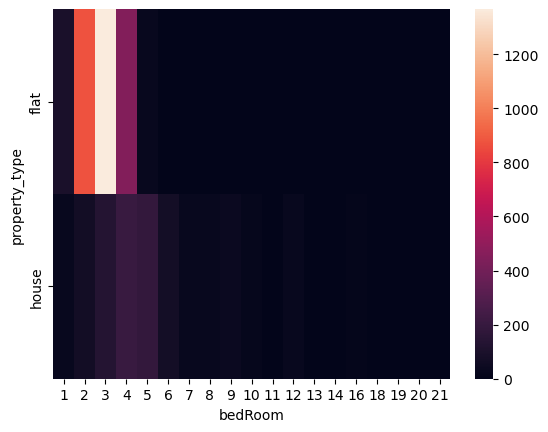

In [360]:
sns.heatmap(pd.crosstab(df['property_type'],df['bedRoom']))

In [362]:
# checking outliers
df[df['bedRoom'] >= 10]
# Few rows are having very low area compared to these many bedrooms (How is that possible)

society property_type           sector  price  \
32                            nul         house        sector 28  12.50   
168                dlf city plots         house        sector 26  20.00   
330           huda plot sector 38         house        sector 38   4.30   
371     floor wise designer kothi         house        sector 25  13.00   
468                   independent         house        sector 13   9.00   
507                   independent         house        sector 13   0.50   
674                   independent         house        sector 43   4.50   
760                   independent         house        sector 56  11.95   
789                   independent         house        sector 46   6.50   
799              dlf city phase 1         house        sector 26   9.25   
838                   independent         house         sector 9   1.25   
898                   independent         house        sector 11   3.50   
954                   independent         house        sector 40   9.50   
992                   independent         house        sector 25  16.00   
1133                  independent         house        sector 47   6.09   
1204                  independent         house        sector 13   2.25   
1282                  independent         house        sector 56   8.00   
1300                  independent         house        sector 25   9.00   
1360                 malibu towne         house        sector 47   8.50   
1371                private house         house        sector 55   7.05   
1429    ganpati heights apartment         house        sector 13   1.25   
1441                  independent         house        sector 11   4.50   
1473       dlf city plots phase 2         house        sector 25  10.00   
1511               uppal southend         house        sector 49   6.75   
1554                  independent         house        sector 26   8.49   
1611                  independent         house        sector 57   6.95   
1640                  independent         house        sector 24   4.50   
1712                  independent         house        sector 14   8.00   
1717                  independent         house        sector 28    NaN   
1764                  independent         house        sector 43   3.00   
1800                  independent         house        sector 38   8.00   
1882                  independent         house        sector 24   3.20   
1891                  independent         house        sector 27   8.25   
2052               uppal southend         house        sector 49   6.75   
2107                     shivpuri         house         sector 7   2.40   
2129                  independent         house       sector 104   0.80   
2166        dlf city plot phase 4         house        sector 28  13.00   
2304                  independent         house        sector 43   7.50   
2305                  independent         house  sohna road road   0.95   
2319                  independent         house        sector 55   9.19   
2328       luxury dlf city floors         house        sector 26   8.25   
2383       laxmi garden sector-11         house        sector 11   1.50   
2486                  independent         house        sector 41   4.25   
2525                  independent         house        sector 31   9.25   
2542  independent house sector 45         house        sector 40   9.00   
2595                  independent         house        sector 43   2.25   
2639                  independent         house        sector 26  14.75   
2650                  independent         house        sector 26  26.00   
2670                  independent         house        sector 54   5.50   
2704   unitech palms south city 1         house        sector 41   9.35   
2763                  independent         house        sector 43   2.20   
2787                  independent         house        sector 39   7.00   
2829                     shivpuri         house    

<Axes: xlabel='property_type', ylabel='floorNum'>

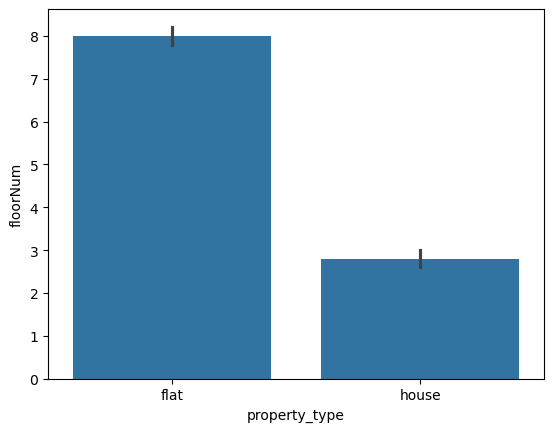

In [364]:
sns.barplot(x=df['property_type'],y=df['floorNum'])

<Axes: xlabel='property_type', ylabel='floorNum'>

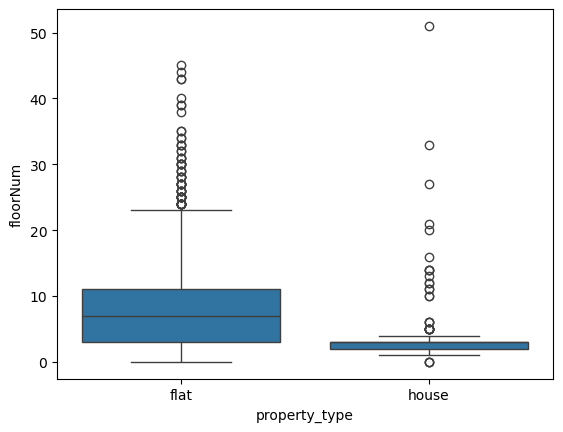

In [366]:
sns.boxplot(x=df['property_type'],y=df['floorNum'])

In [368]:
# Few houses is on very high floor (Will have to fix them as it is not following the general trend)

In [370]:
# checking for outliers
df[(df['property_type'] == 'house') & (df['floorNum'] > 10)]

society property_type      sector  price  \
368               spaze privy         house   sector 72   3.10   
382                ninex city         house   sector 76   1.75   
485               greenopolis         house   sector 89   0.70   
610               independent         house   sector 92   1.80   
1055      ireo victory valley         house   sector 67   8.00   
1153           ats tourmaline         house  sector 109   1.87   
1228         suncity township         house   sector 54   2.00   
1294              spaze privy         house   sector 72   3.09   
1603      satya the hermitage         house  sector 103   3.15   
2452           dlf the arbour         house   sector 63   8.50   
2509        suncity avenue 76         house   sector 76   0.75   
2605   vatika the seven lamps         house   sector 82   1.60   
3170          godrej meridien         house  sector 106   5.60   
3596  indiabulls centrum park         house  sector 103   3.25   

      price_per_sqft    area  \
368           8486.0  3653.0   
382           6250.0  2800.0   
485           5397.0  1297.0   
610           7627.0  2360.0   
1055         22222.0  3600.0   
1153          8697.0  2150.0   
1228         30968.0   646.0   
1294          6981.0  4426.0   
1603          6702.0  4700.0   
2452         21519.0  3950.0   
2509         10067.0   745.0   
2605          6597.0  2425.0   
3170         14000.0  4000.0   
3596          8125.0  4000.0   

                                                                   areaWithType  \
368                                                Plot area 3653(339.37 sq.m.)   
382                                            Carpet area: 2800 (260.13 sq.m.)   
485                                           Built Up area: 1297 (120.5 sq.m.)   
610                                          Built Up area: 2360 (219.25 sq.m.)   
1055                                                Plot area 400(334.45 sq.m.)   
1153                                         Built Up area: 2150 (199.74 sq.m.)   
1228                   Plot area 60Built Up area: 60 sq.m.Carpet area: 59 sq.m.   
1294  Built Up area: 3653 (339.37 sq.m.)Carpet area: 2922 sq.ft. (271.46 sq.m.)   
1603                                         Built Up area: 4700 (436.64 sq.m.)   
2452                                         Built Up area: 3950 (366.97 sq.m.)   
2509          Plot area 745(69.21 sq.m.)Built Up area: 745 sq.ft. (69.21 sq.m.)   
2605                                               Plot area 2425(225.29 sq.m.)   
3170                                               Plot area 4000(371.61 sq.m.)   
3596                                               Plot area 4000(371.61 sq.m.)   

      bedRoom  bathroom balcony  floorNum      facing       agePossession  \
368         5         5      3+      21.0          NA      Relatively New   
382         4         4       0      14.0          NA           Undefined   
485         2         2       2      14.0  North-East           Undefined   
610         4         5       0      13.0          NA           Undefined   
1055        6         7      3+      51.0  North-East      Moderately Old   
1153        3         4       0      12.0          NA           Undefined   
1228        9         9       3      11.0       North      Relatively New   
1294        5         5      3+      14.0        East      Relatively New   
1603        4         5       0      12.0        East           Undefined   
2452        4         4      3+      27.0          NA           Undefined   
2509        2         2       2      11.0  North-East        New Property   
2605        4         4      3+      16.0       North      Moderately Old   
3170        5         4      3+      33.0  North-East        New Property   
3596        4         3      3+      20.0          NA  Under Construction   

      super_built_up_area  built_up_area  carpet_area  study room  \
368                   NaN         3653.0          NaN           0   
382       

In [372]:
# Conclusion -> these are villa but counted as houses

<Axes: xlabel='agePossession', ylabel='property_type'>

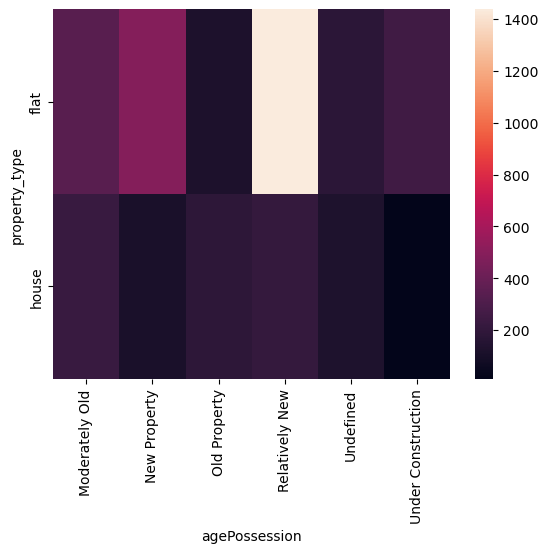

In [374]:
sns.heatmap(pd.crosstab(df['property_type'],df['agePossession']))

<Axes: xlabel='agePossession', ylabel='property_type'>

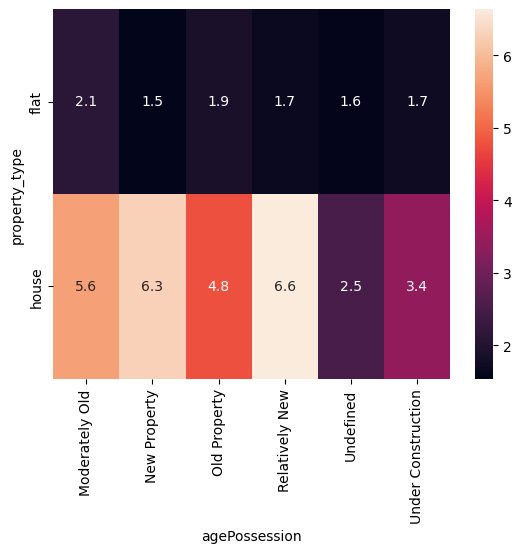

In [376]:
sns.heatmap(pd.pivot_table(df,index='property_type',columns='agePossession',values='price',aggfunc='mean'),annot=True)

<Axes: xlabel='bedRoom', ylabel='property_type'>

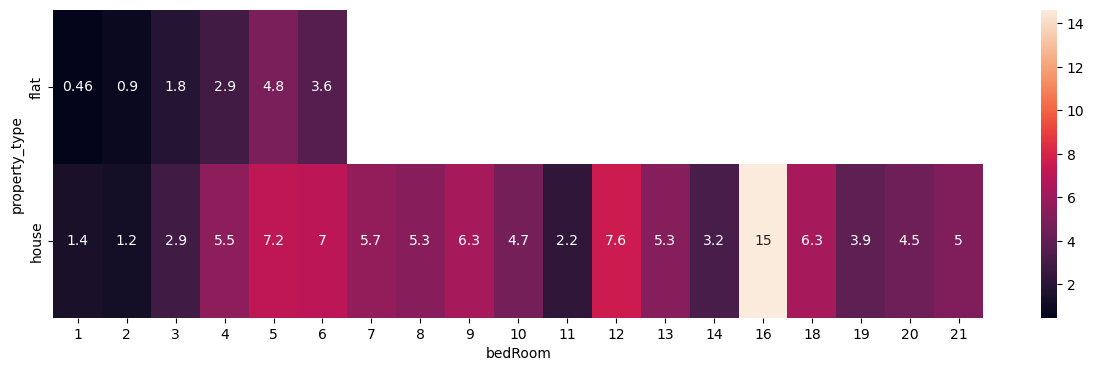

In [378]:
plt.figure(figsize=(15,4))
sns.heatmap(pd.pivot_table(df,index='property_type',columns='bedRoom',values='price',aggfunc='mean'),annot=True)

<Axes: xlabel='furnishing_type', ylabel='property_type'>

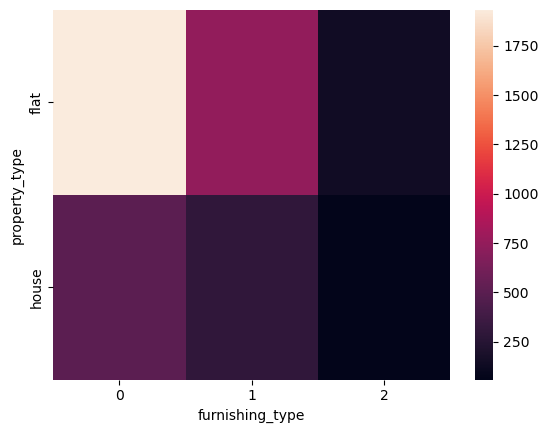

In [380]:
sns.heatmap(pd.crosstab(df['property_type'],df['furnishing_type']))

<Axes: xlabel='furnishing_type', ylabel='property_type'>

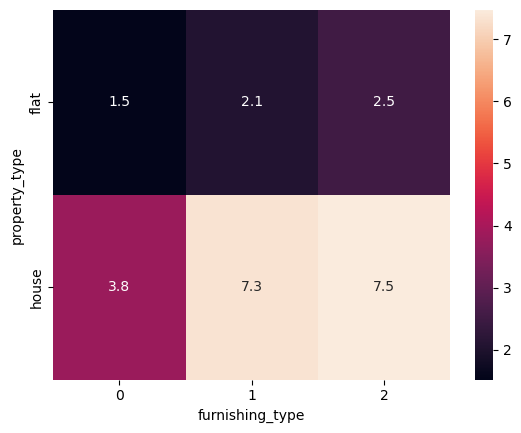

In [382]:
sns.heatmap(pd.pivot_table(df,index='property_type',columns='furnishing_type',values='price',aggfunc='mean'),annot=True)

<Axes: xlabel='property_type', ylabel='luxury_score'>

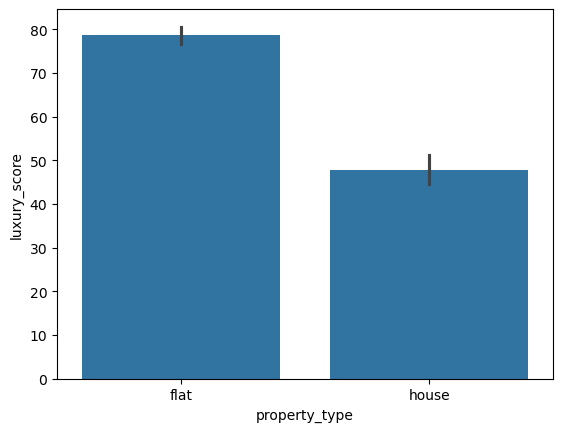

In [384]:
sns.barplot(x=df['property_type'],y=df['luxury_score'])

<Axes: xlabel='property_type', ylabel='luxury_score'>

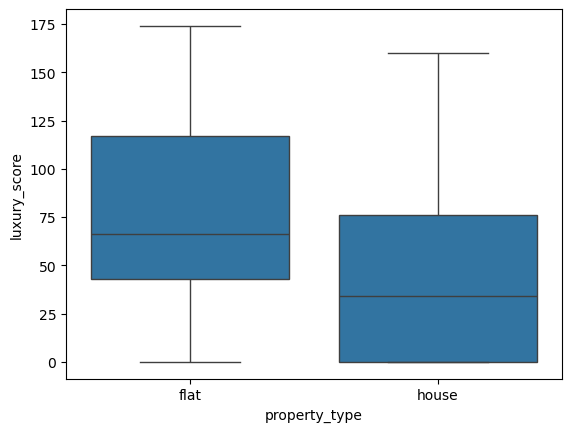

In [386]:
sns.boxplot(x=df['property_type'],y=df['luxury_score'])

<Axes: xlabel='sector', ylabel='property_type'>

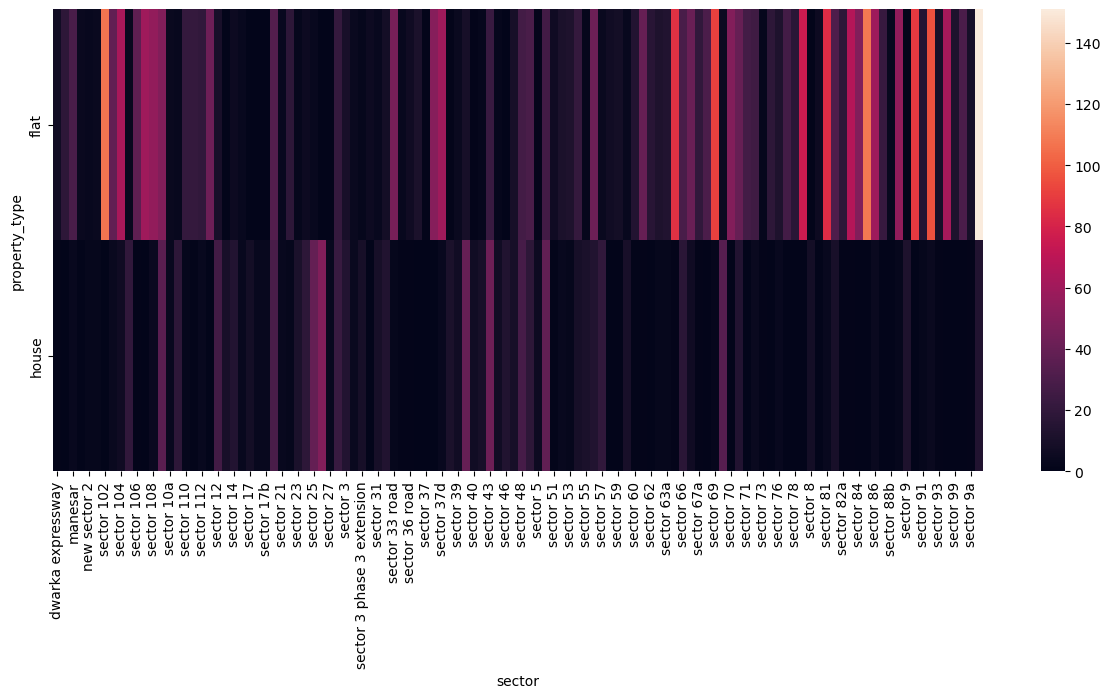

In [388]:
# sector analysis
plt.figure(figsize=(15,6))
sns.heatmap(pd.crosstab(df['property_type'],df['sector'].sort_index()))

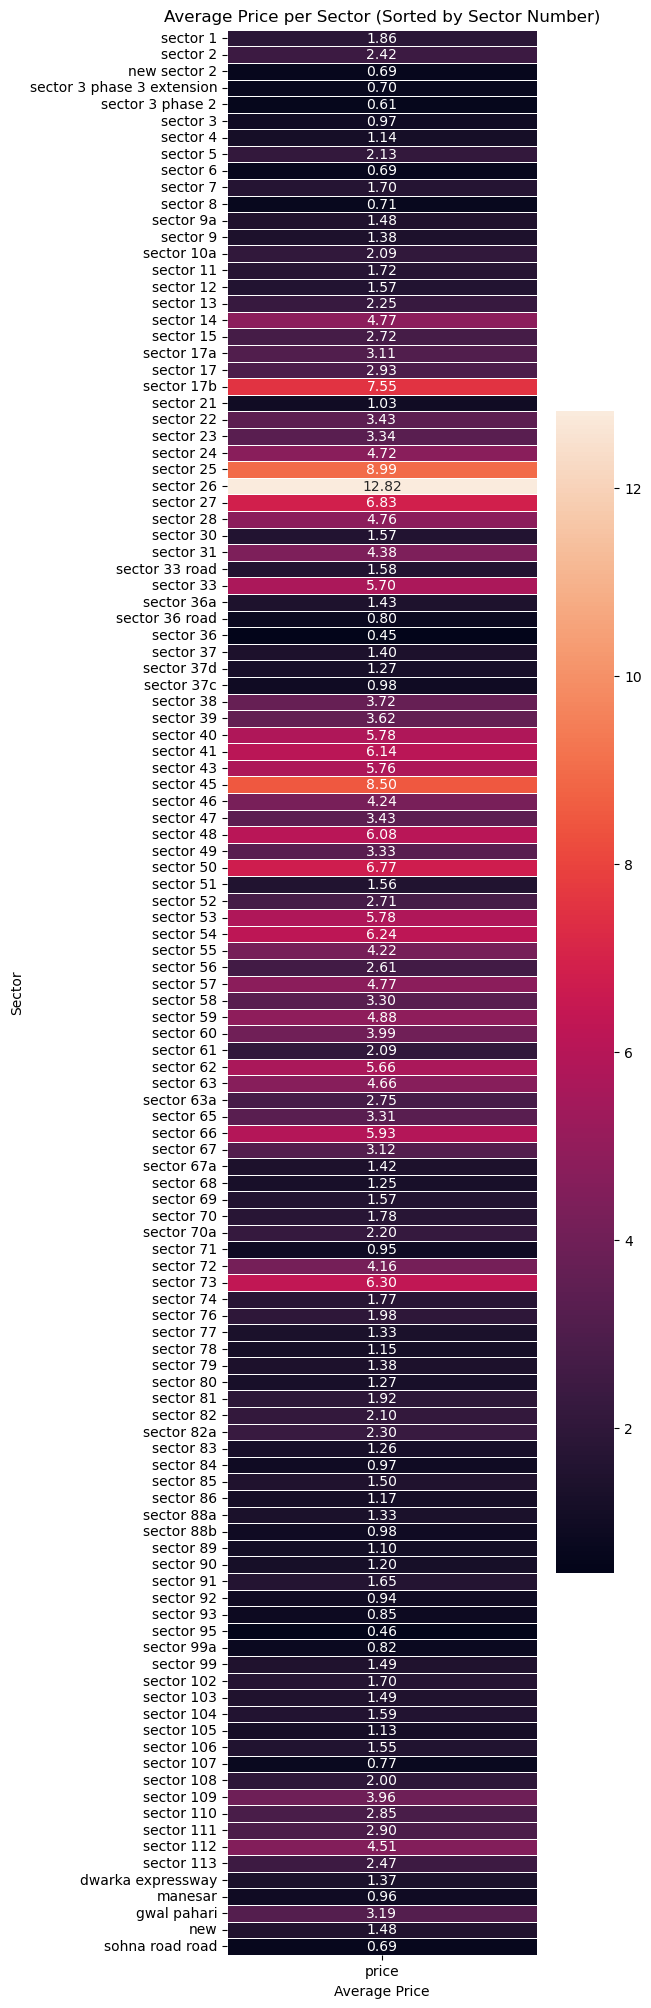

In [390]:
# sector analysis
import re
# Group by 'sector' and calculate the average price
avg_price_per_sector = df.groupby('sector')['price'].mean().reset_index()

# Function to extract sector numbers
def extract_sector_number(sector_name):
    match = re.search(r'\d+', sector_name)
    if match:
        return int(match.group())
    else:
        return float('inf')  # Return a large number for non-numbered sectors

avg_price_per_sector['sector_number'] = avg_price_per_sector['sector'].apply(extract_sector_number)

# Sort by sector number
avg_price_per_sector_sorted_by_sector = avg_price_per_sector.sort_values(by='sector_number')

# Plot the heatmap
plt.figure(figsize=(5, 25))
sns.heatmap(avg_price_per_sector_sorted_by_sector.set_index('sector')[['price']], annot=True, fmt=".2f", linewidths=.5)
plt.title('Average Price per Sector (Sorted by Sector Number)')
plt.xlabel('Average Price')
plt.ylabel('Sector')
plt.show()


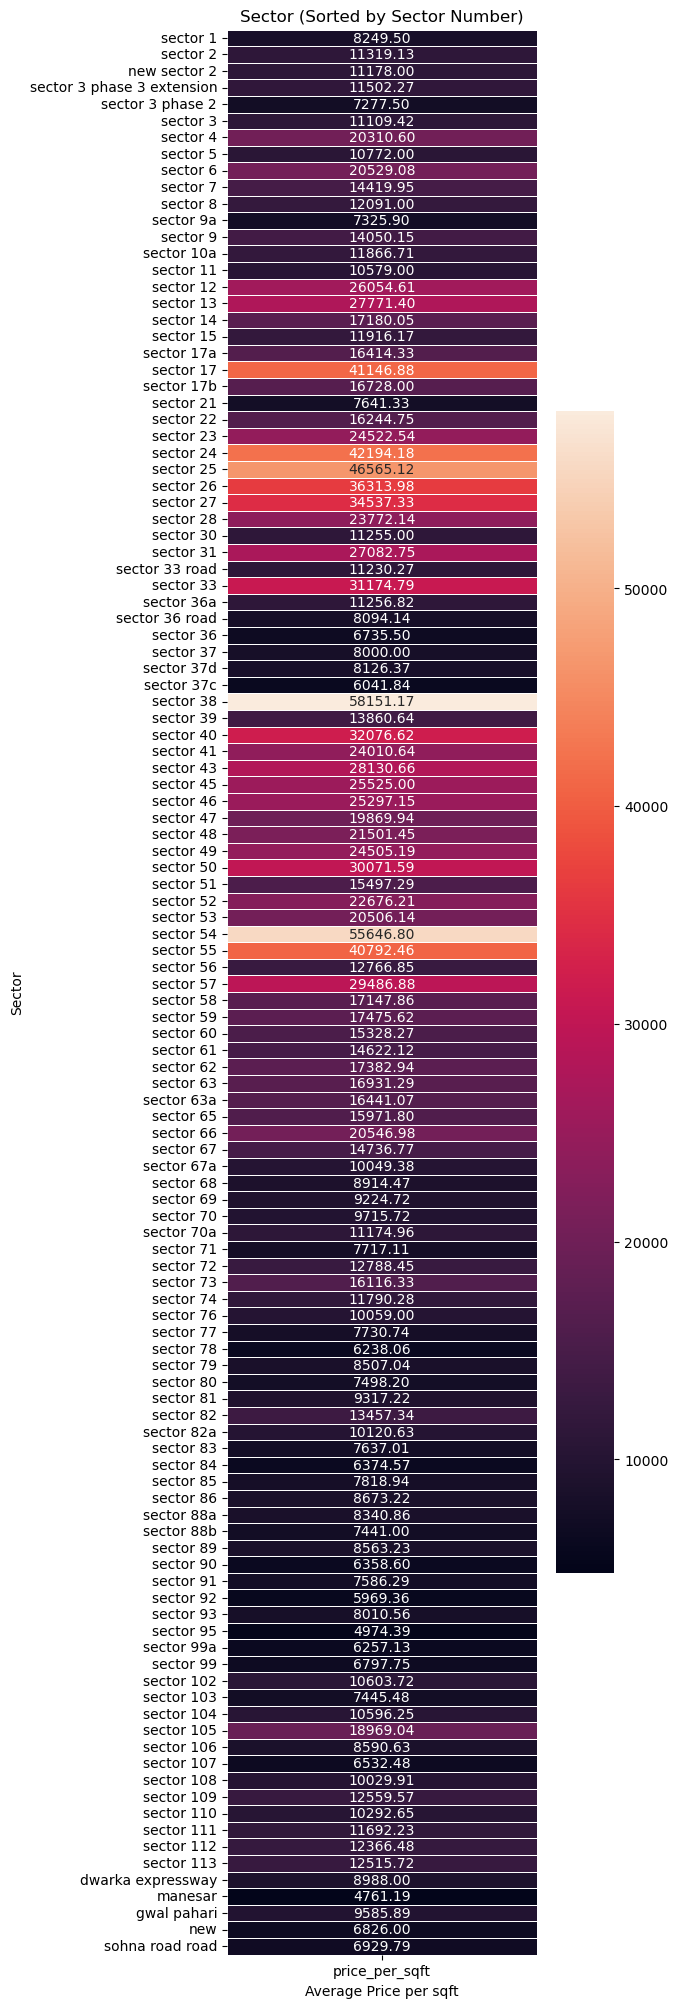

In [392]:
avg_price_per_sqft_sector = df.groupby('sector')['price_per_sqft'].mean().reset_index()

avg_price_per_sqft_sector['sector_number'] = avg_price_per_sqft_sector['sector'].apply(extract_sector_number)

# Sort by sector number
avg_price_per_sqft_sector_sorted_by_sector = avg_price_per_sqft_sector.sort_values(by='sector_number')

# Plot the heatmap
plt.figure(figsize=(5, 25))
sns.heatmap(avg_price_per_sqft_sector_sorted_by_sector.set_index('sector')[['price_per_sqft']], annot=True, fmt=".2f", linewidths=.5)
plt.title('Sector (Sorted by Sector Number)')
plt.xlabel('Average Price per sqft')
plt.ylabel('Sector')
plt.show()

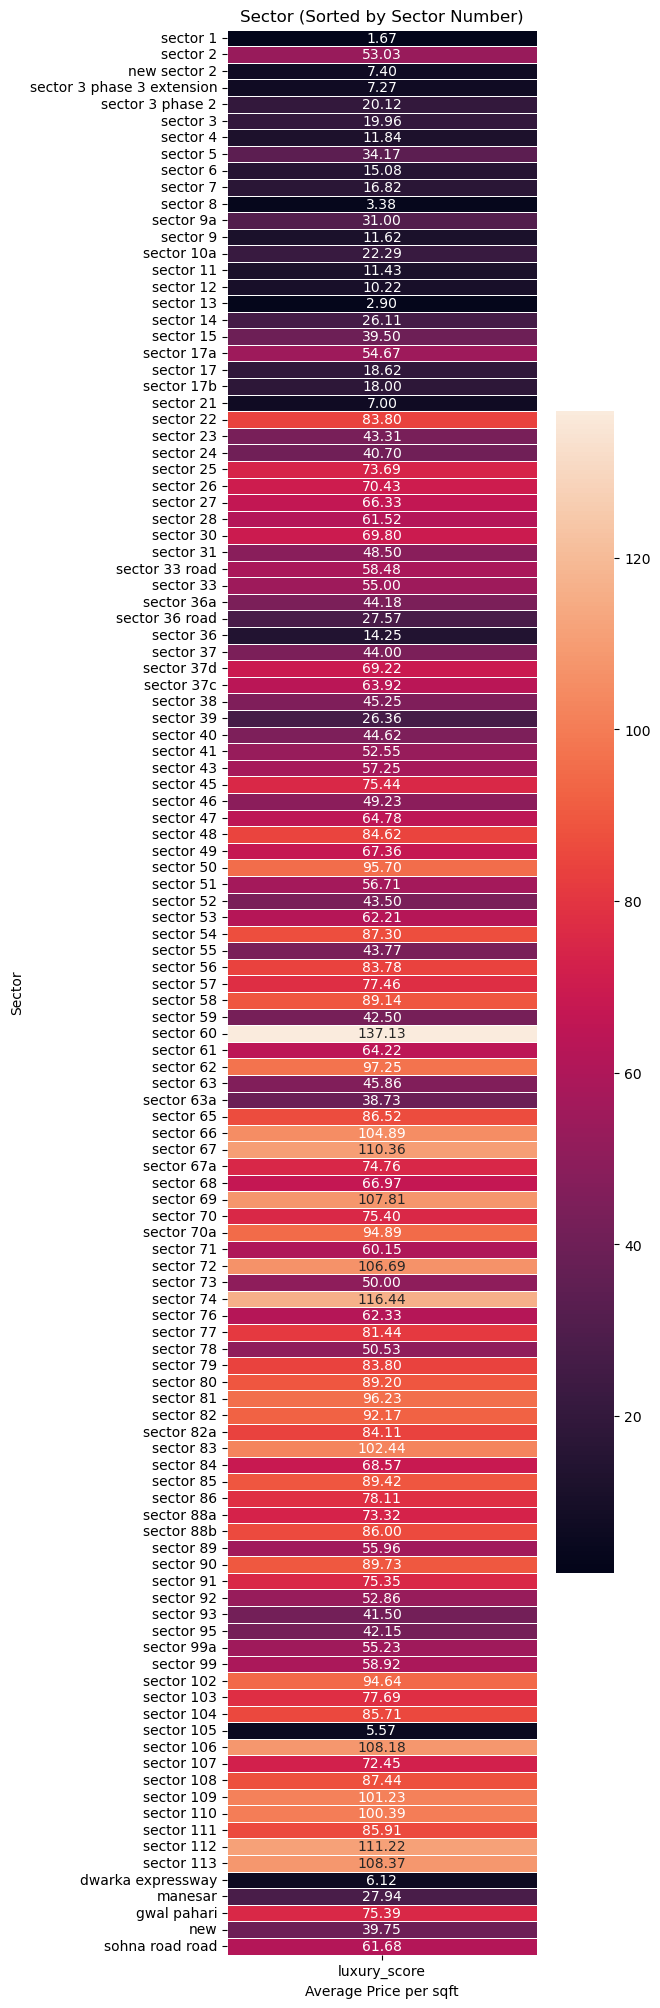

In [394]:
luxury_score = df.groupby('sector')['luxury_score'].mean().reset_index()

luxury_score['sector_number'] = luxury_score['sector'].apply(extract_sector_number)

# Sort by sector number
luxury_score_sector = luxury_score.sort_values(by='sector_number')

# Plot the heatmap
plt.figure(figsize=(5, 25))
sns.heatmap(luxury_score_sector.set_index('sector')[['luxury_score']], annot=True, fmt=".2f", linewidths=.5)
plt.title('Sector (Sorted by Sector Number)')
plt.xlabel('Average Price per sqft')
plt.ylabel('Sector')
plt.show()

<Axes: xlabel='area', ylabel='price'>

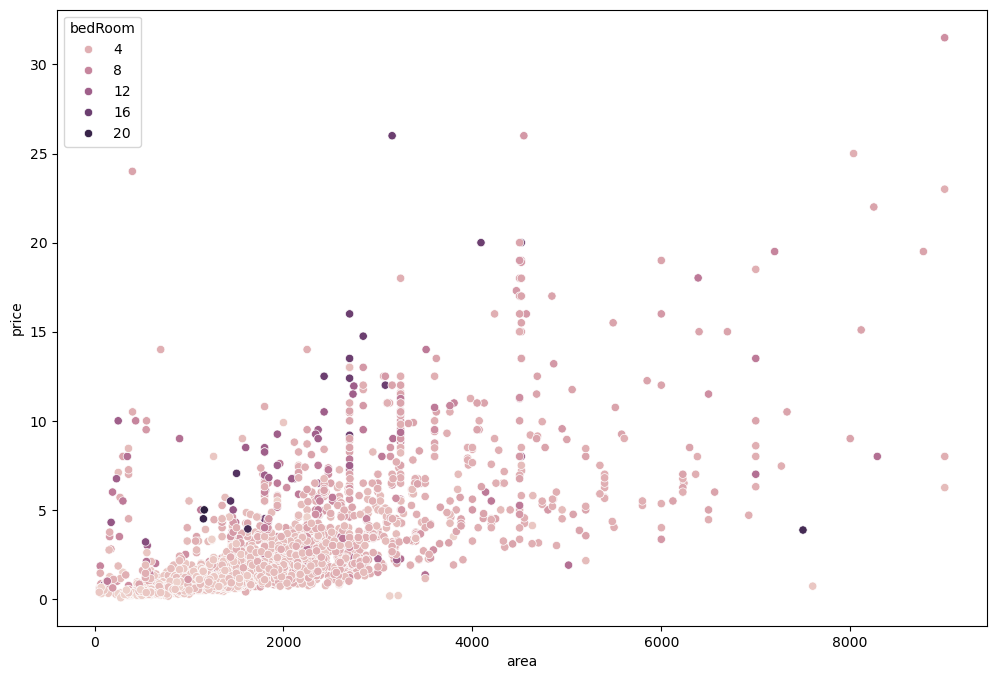

In [398]:
# Area vs Price 
plt.figure(figsize=(12,8))
sns.scatterplot(x = df[df['area']<10000]['area'],y = df['price'],hue=df['bedRoom'])
# potential Outliers or data errors present

<Axes: xlabel='area', ylabel='price'>

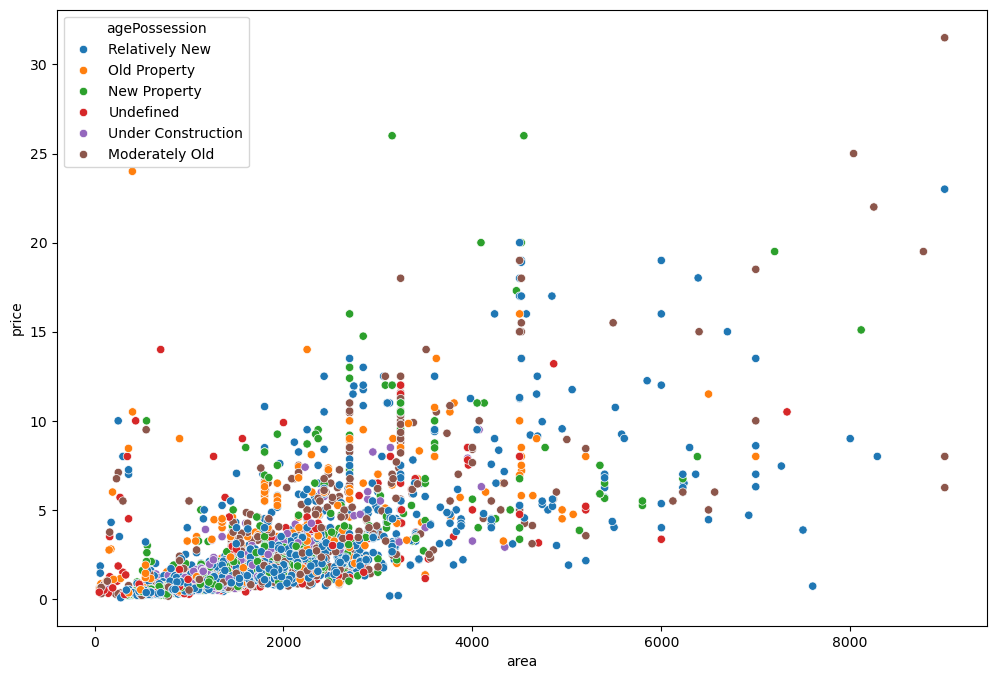

In [402]:
plt.figure(figsize=(12,8))
sns.scatterplot(x = df[df['area']<10000]['area'],y = df['price'],hue=df['agePossession'])

<Axes: xlabel='area', ylabel='price'>

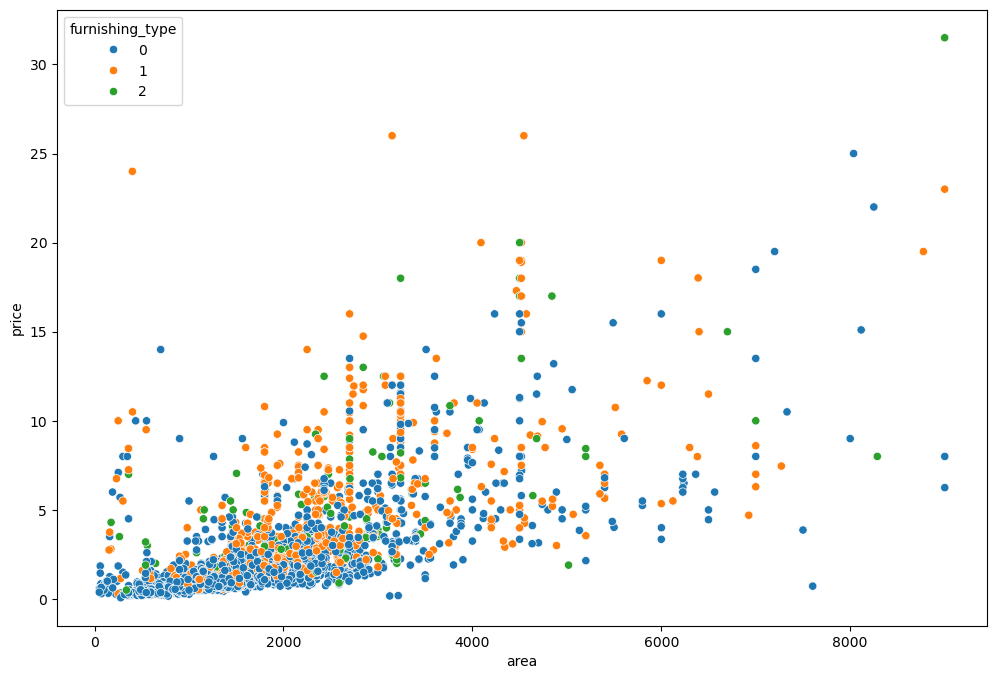

In [406]:
plt.figure(figsize=(12,8))
sns.scatterplot(x = df[df['area']<10000]['area'],y = df['price'],hue=df['furnishing_type'].astype('category'))

<Axes: xlabel='bedRoom', ylabel='price'>

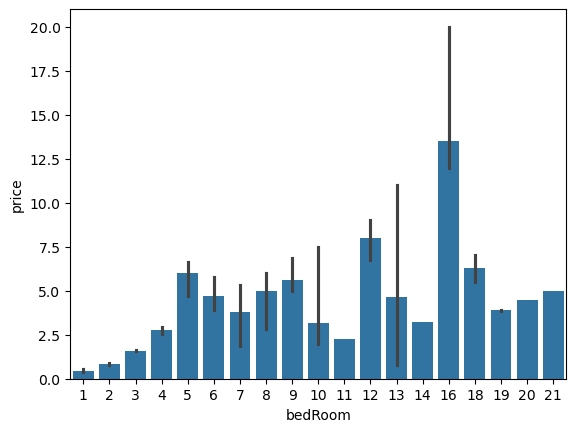

In [408]:
sns.barplot(x=df['bedRoom'],y=df['price'],estimator=np.median)

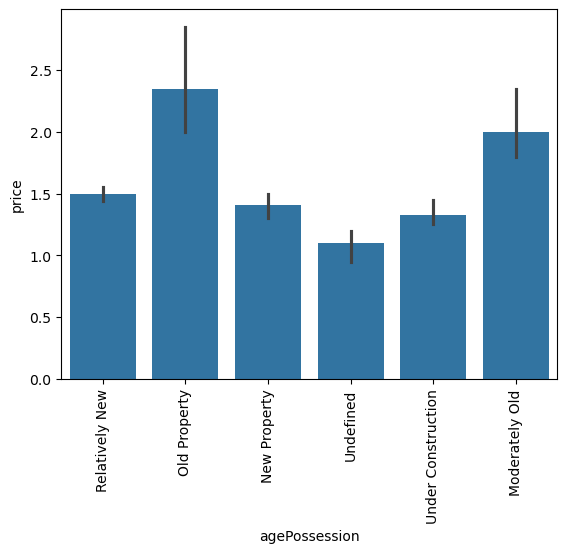

In [410]:
sns.barplot(x=df['agePossession'],y=df['price'],estimator=np.median)
plt.xticks(rotation='vertical')
plt.show()

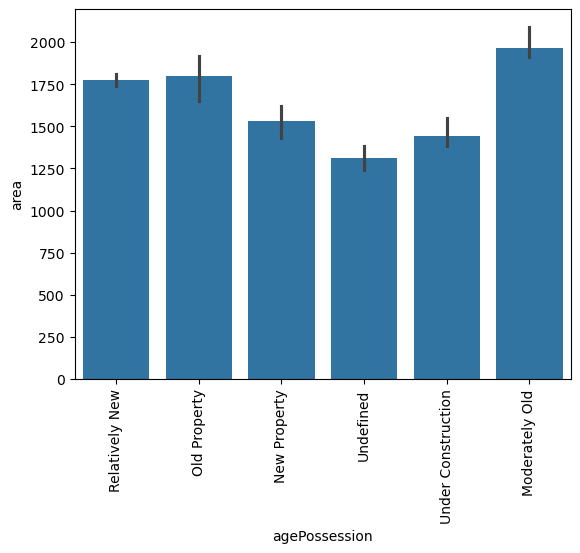

In [412]:
sns.barplot(x=df['agePossession'],y=df['area'],estimator=np.median)
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='furnishing_type', ylabel='price'>

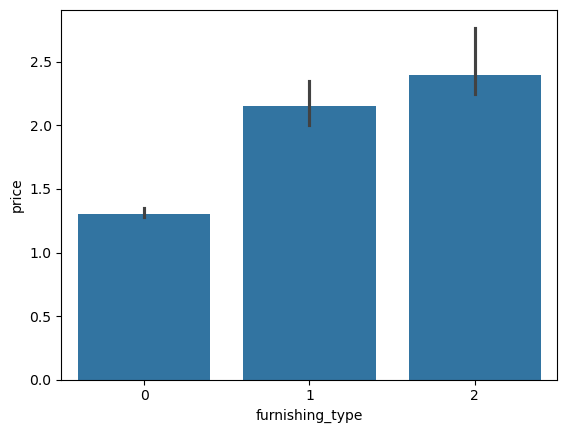

In [414]:
sns.barplot(x=df['furnishing_type'],y=df['price'],estimator=np.median)

<Axes: xlabel='luxury_score', ylabel='price'>

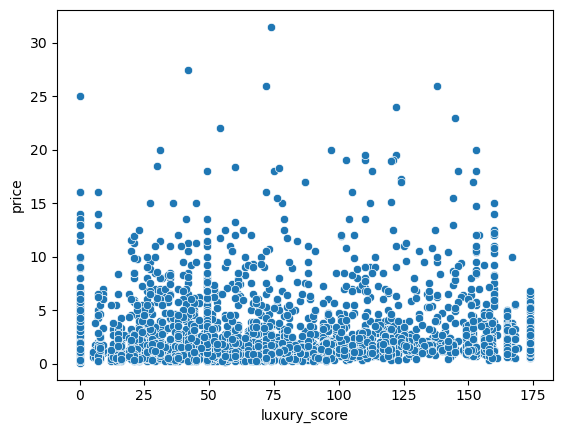

In [420]:
sns.scatterplot(x = df['luxury_score'],y = df['price'])
# No trend with luxury score which was expected

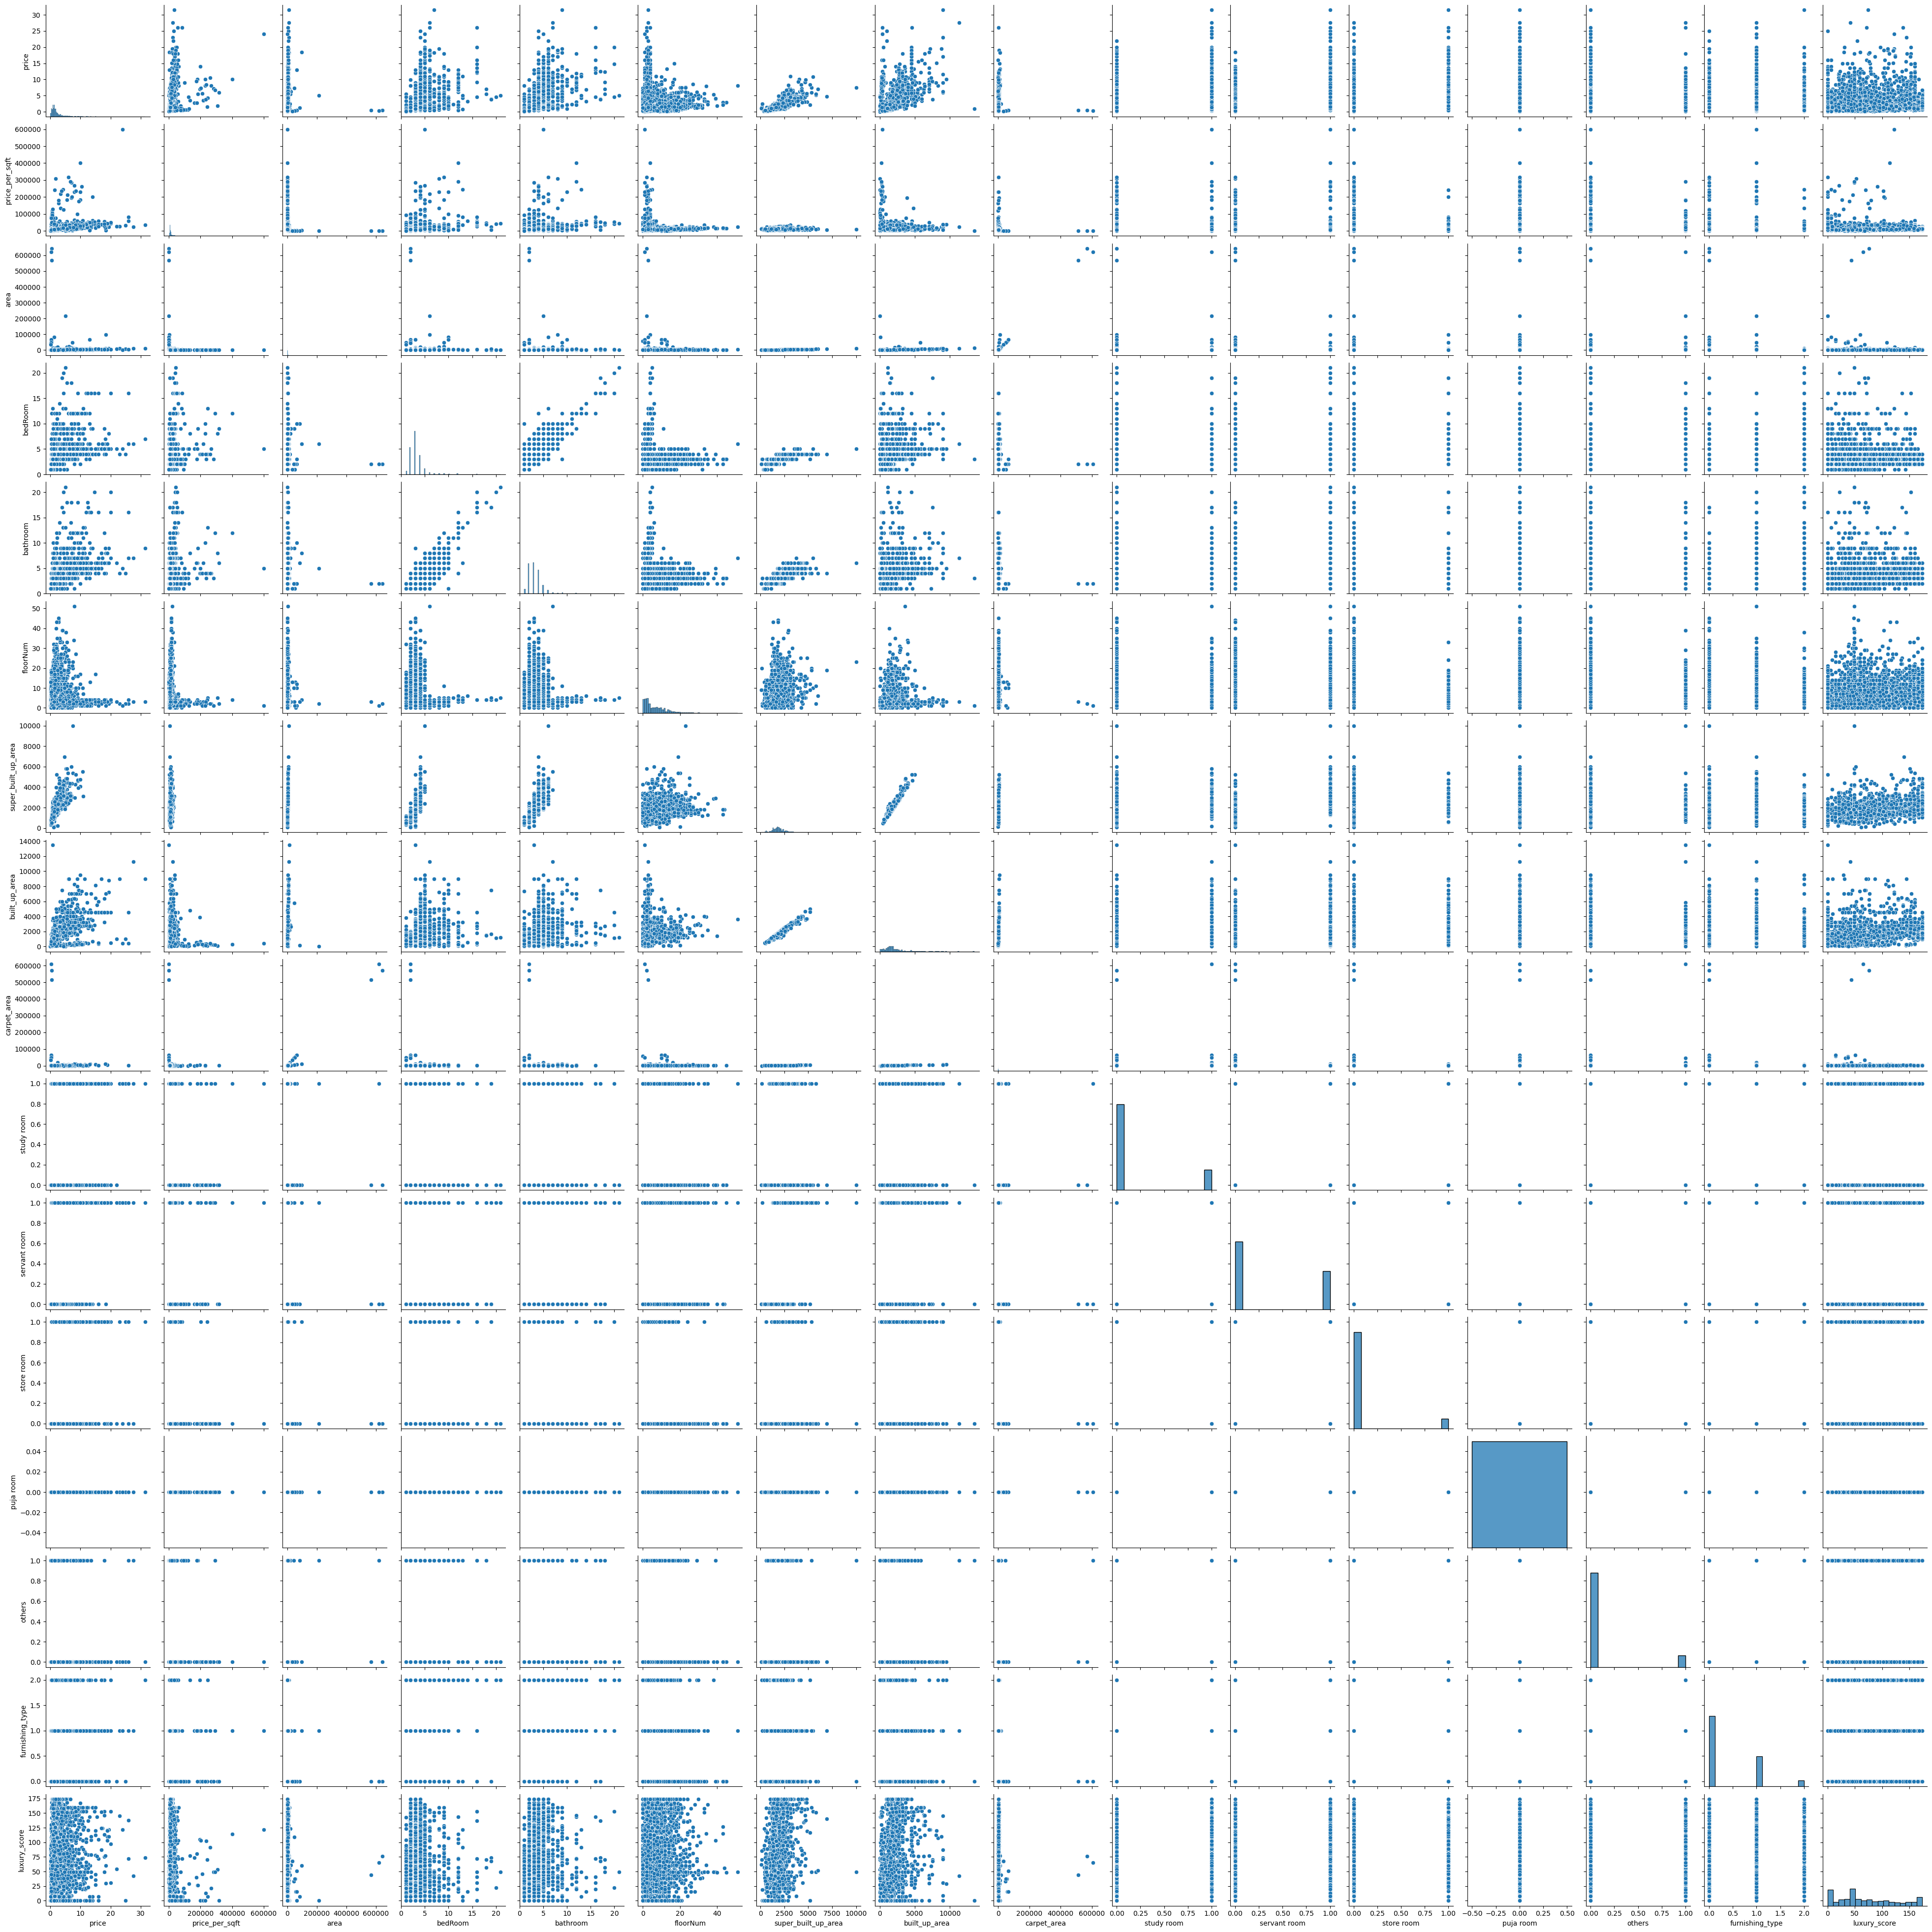

In [426]:
sns.pairplot(df)